**Reasoning**:
I need to import the specified libraries and set the plotting configurations as instructed by the subtask.



In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib va Seaborn uchun umumiy sozlamalarni o'rnatish
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

print("Kerakli kutubxonalar import qilindi va sozlamalar o'rnatildi.")

Kerakli kutubxonalar import qilindi va sozlamalar o'rnatildi.


In [120]:
application_metadata_df = pd.read_csv('application_metadata.csv')

# Rename 'customer_ref' to 'customer_id'
application_metadata_df = application_metadata_df.rename(columns={'customer_ref': 'customer_id'})

# Display the first 5 rows of the DataFrame
display(application_metadata_df.head())

# Print a concise summary of the DataFrame
print(application_metadata_df.info())

# Display descriptive statistics for the numerical columns
display(application_metadata_df.describe())

# Print the count of missing values for each column
print(application_metadata_df.isnull().sum())

# Print the number of duplicate rows in the DataFrame
print("Duplicates:", application_metadata_df.duplicated().sum())

# Normalize the categorical columns
for col in ['preferred_contact', 'referral_code', 'account_status_code']:
    application_metadata_df[col] = application_metadata_df[col].str.upper().str.strip()

# Define numerical columns for outlier capping
numerical_cols_for_outlier = [
    'application_hour',
    'application_day_of_week',
    'account_open_year',
    'random_noise_1',
    'num_login_sessions',
    'num_customer_service_calls'
]

# Cap outliers using the IQR method
for col in numerical_cols_for_outlier:
    Q1 = application_metadata_df[col].quantile(0.25)
    Q3 = application_metadata_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    application_metadata_df[col] = np.where(
        application_metadata_df[col] > upper_bound, upper_bound,
        np.where(application_metadata_df[col] < lower_bound, lower_bound, application_metadata_df[col])
    )

print("\nCategorical columns normalized and outliers in specified numerical columns capped.")

customer_id  application_id  application_hour  application_day_of_week  \
0       100000          618540                21                        0   
1       100001          589784                 9                        6   
2       100002          554219                10                        4   
3       100003          613505                 3                        4   
4       100004          571219                 9                        1   

   account_open_year preferred_contact referral_code account_status_code  \
0               2018             Email       REF0000               ACT-1   
1               2021             Phone       REF0000               ACT-1   
2               2019             Phone       REF0000               ACT-1   
3               2011             Email       REF0000               ACT-2   
4               2021             Email       REF0000               ACT-1   

   random_noise_1  num_login_sessions  num_customer_service_calls  \
0        1.141229                  12                           2   
1        0.943839                  10                           4   
2       -0.116033                   4                           3   
3       -0.040562                   7                           0   
4        0.819017                   6                           0   

   has_mobile_app  paperless_billing  
0               0                  0  
1               0                  1  
2               1                  1  
3               1                  0  
4               1                  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10001 non-null  int64  
 1   application_id              10001 non-null  int64  
 2   application_hour            10001 non-null  int64  
 3   application_day_of_week     10001 non-null  int64  
 4   account_open_year           10001 non-null  int64  
 5   preferred_contact           10001 non-null  object 
 6   referral_code               10001 non-null  object 
 7   account_status_code         10001 non-null  object 
 8   random_noise_1              10001 non-null  float64
 9   num_login_sessions          10001 non-null  int64  
 10  num_customer_service_calls  10001 non-null  int64  
 11  has_mobile_app              10001 non-null  int64  
 12  paperless_billing           10001 non-null  int64  
dtypes: float64(1), int64(9), object

customer_id  application_id  application_hour  \
count   10001.000000    10001.000000      10001.000000   
mean   105000.000000   594320.558144         11.584342   
std      2887.184355    29022.689382          6.932497   
min    100000.000000   544822.000000          0.000000   
25%    102500.000000   568956.000000          6.000000   
50%    105000.000000   593846.000000         12.000000   
75%    107500.000000   619980.000000         18.000000   
max    110000.000000   644779.000000         23.000000   

       application_day_of_week  account_open_year  random_noise_1  \
count             10001.000000       10001.000000    10001.000000   
mean                  2.998600        2016.503950       -0.006874   
std                   2.002897           4.033139        0.994512   
min                   0.000000        2010.000000       -4.085696   
25%                   1.000000        2013.000000       -0.675604   
50%                   3.000000        2016.000000       -0.015741   
75%                   5.000000        2020.000000        0.656765   
max                   6.000000        2023.000000        4.313681   

       num_login_sessions  num_customer_service_calls  has_mobile_app  \
count        10001.000000                10001.000000    10001.000000   
mean             8.818518                    2.013499        0.713729   
std              3.811294                    1.426015        0.452040   
min              1.000000                    0.000000        0.000000   
25%              6.000000                    1.000000        0.000000   
50%              8.000000                    2.000000        1.000000   
75%             11.000000                    3.000000        1.000000   
max             30.000000                   10.000000        1.000000   

       paperless_billing  
count       10001.000000  
mean            0.610439  
std             0.487675  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             1.000000  
max             1.000000

customer_id                   0
application_id                0
application_hour              0
application_day_of_week       0
account_open_year             0
preferred_contact             0
referral_code                 0
account_status_code           0
random_noise_1                0
num_login_sessions            0
num_customer_service_calls    0
has_mobile_app                0
paperless_billing             0
dtype: int64
Duplicates: 0

Categorical columns normalized and outliers in specified numerical columns capped.


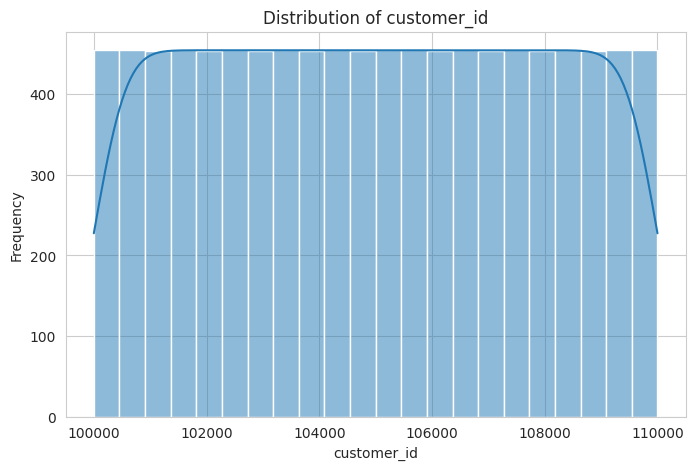

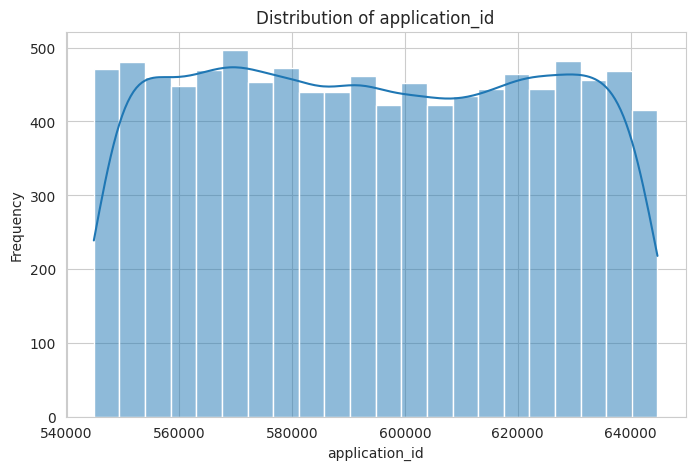

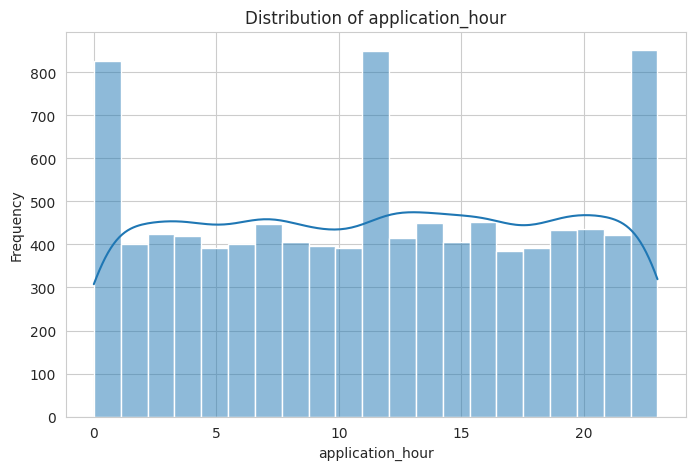

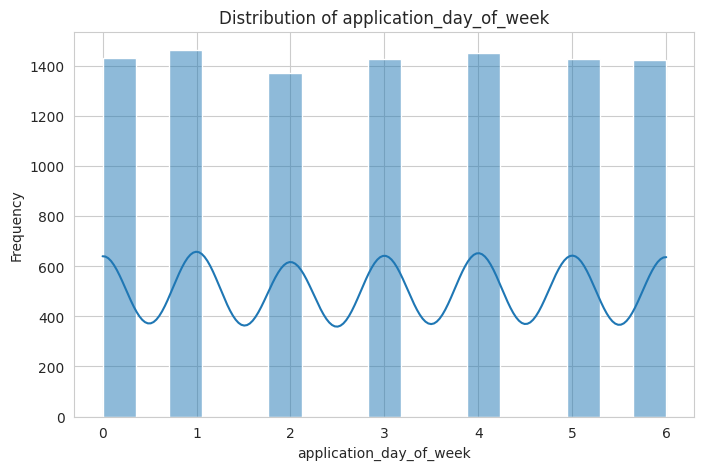

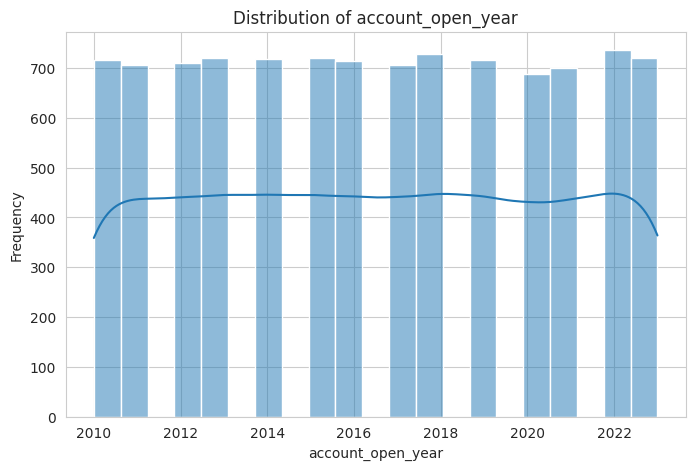

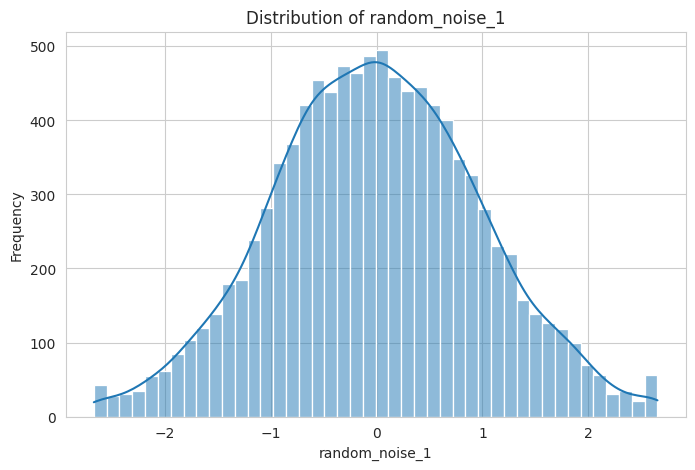

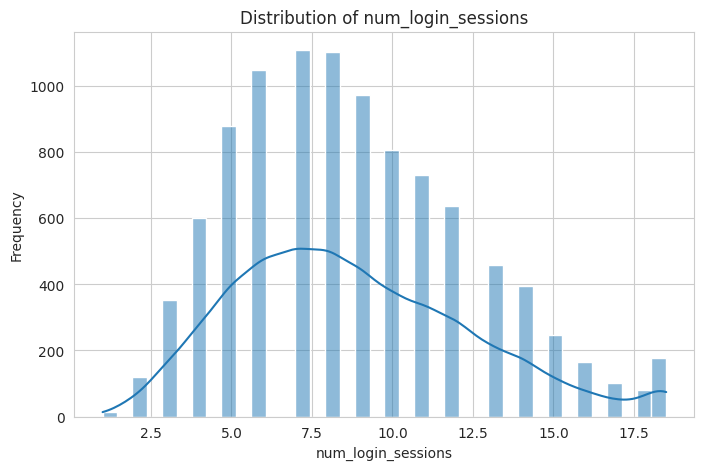

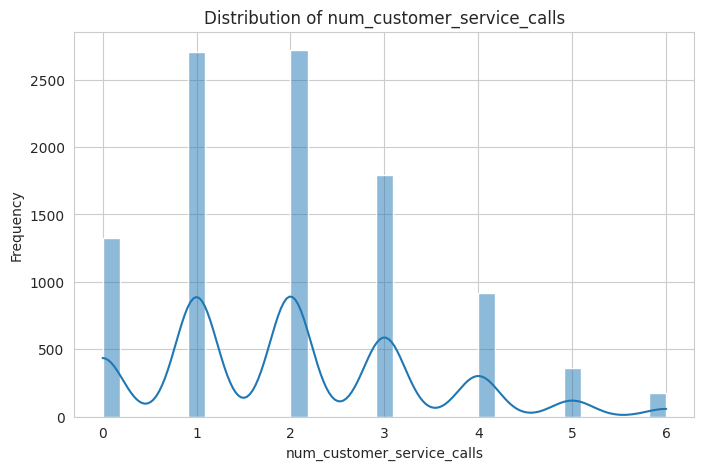

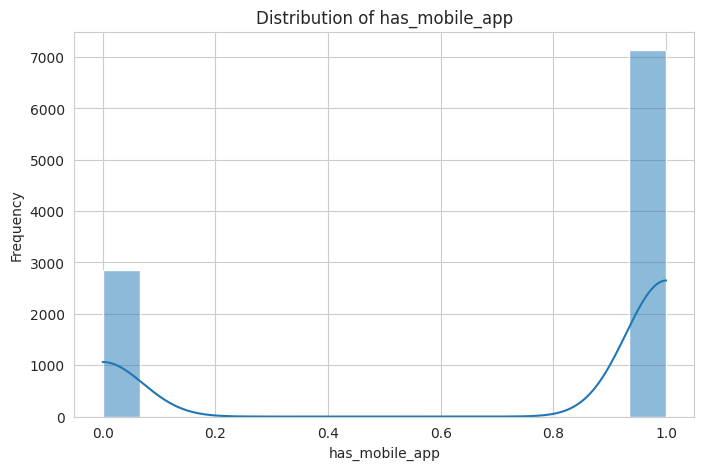

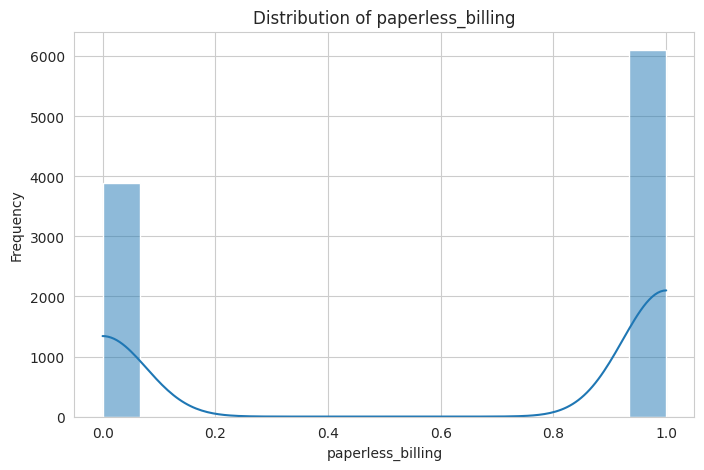

In [121]:
numerical_cols = application_metadata_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(application_metadata_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

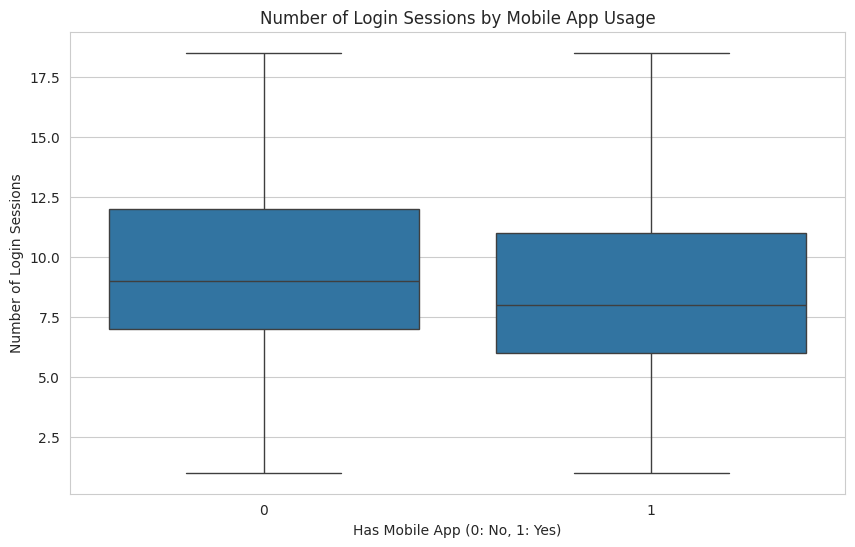

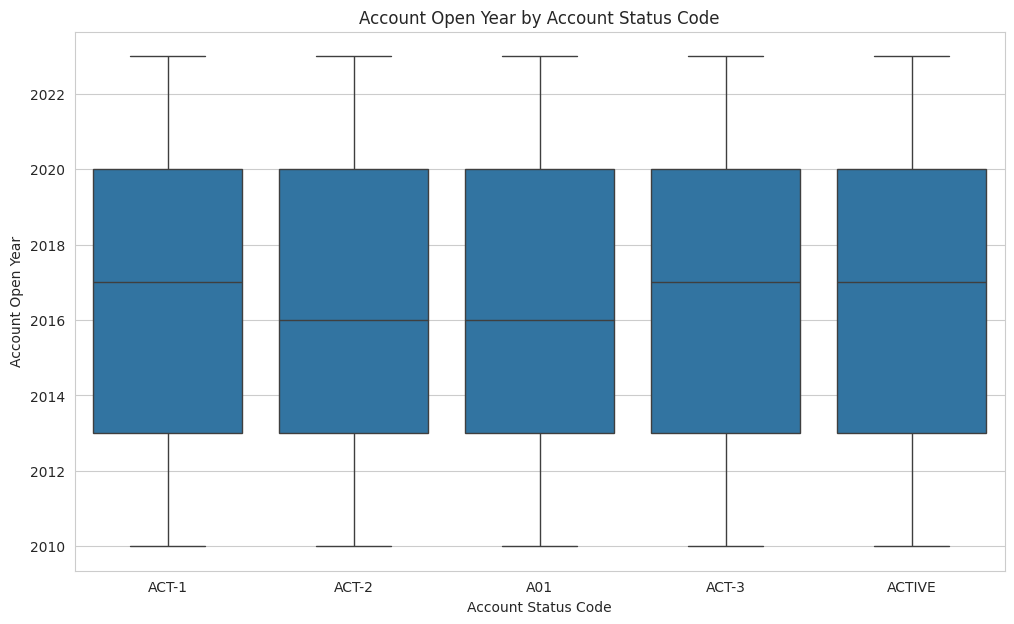

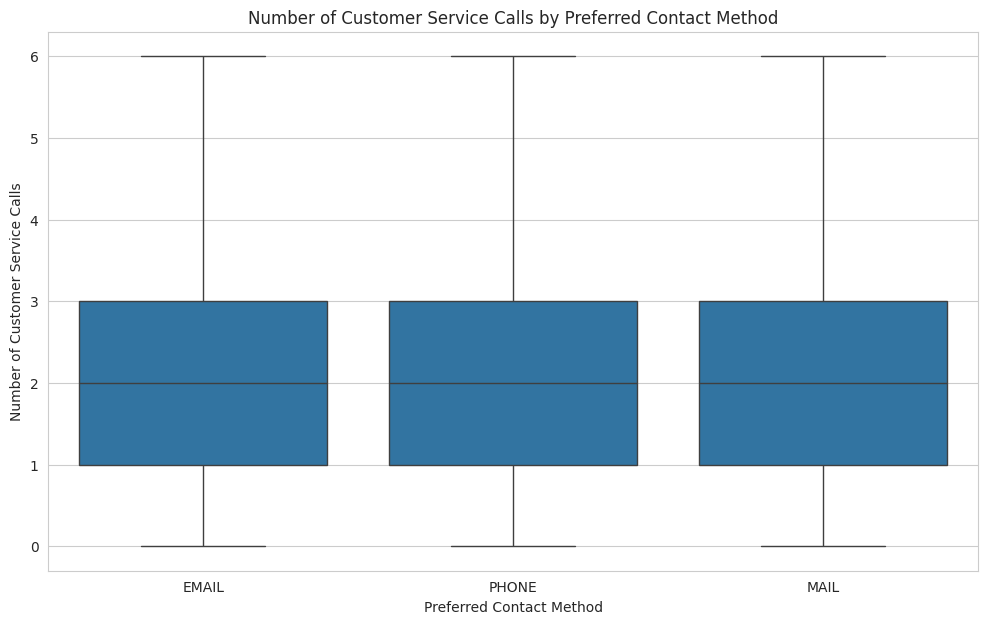

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_mobile_app', y='num_login_sessions', data=application_metadata_df)
plt.title('Number of Login Sessions by Mobile App Usage')
plt.xlabel('Has Mobile App (0: No, 1: Yes)')
plt.ylabel('Number of Login Sessions')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='account_status_code', y='account_open_year', data=application_metadata_df)
plt.title('Account Open Year by Account Status Code')
plt.xlabel('Account Status Code')
plt.ylabel('Account Open Year')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='preferred_contact', y='num_customer_service_calls', data=application_metadata_df)
plt.title('Number of Customer Service Calls by Preferred Contact Method')
plt.xlabel('Preferred Contact Method')
plt.ylabel('Number of Customer Service Calls')
plt.show()

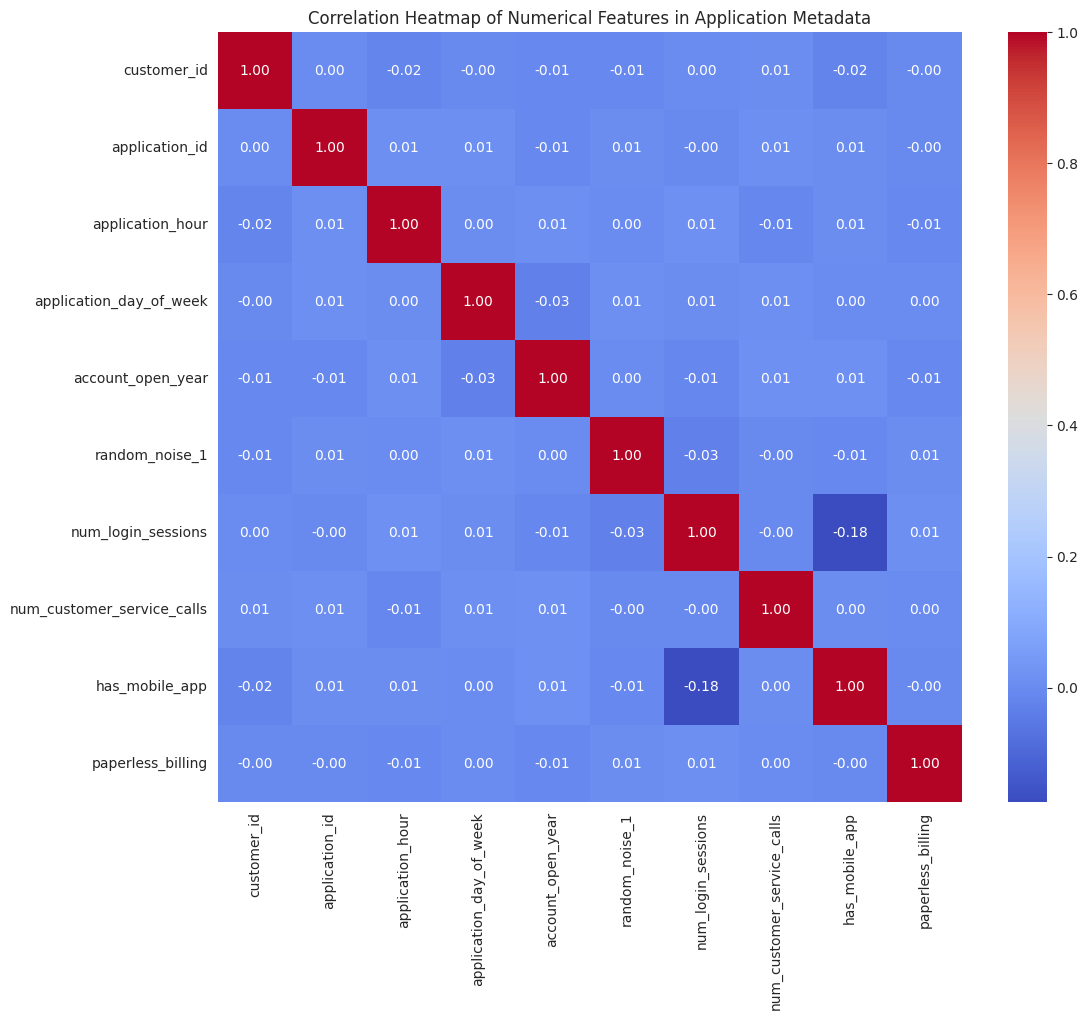

In [123]:
plt.figure(figsize=(12, 10))
corr_matrix = application_metadata_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Application Metadata')
plt.show()

In [124]:
categorical_cols_to_encode = ['preferred_contact', 'referral_code', 'account_status_code']

application_metadata_df = pd.get_dummies(application_metadata_df, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

application_metadata_df['application_day_hour_combined'] = (application_metadata_df['application_day_of_week'] * 24) + application_metadata_df['application_hour']

display(application_metadata_df.head())

customer_id  application_id  application_hour  application_day_of_week  \
0       100000          618540              21.0                      0.0   
1       100001          589784               9.0                      6.0   
2       100002          554219              10.0                      4.0   
3       100003          613505               3.0                      4.0   
4       100004          571219               9.0                      1.0   

   account_open_year  random_noise_1  num_login_sessions  \
0             2018.0        1.141229                12.0   
1             2021.0        0.943839                10.0   
2             2019.0       -0.116033                 4.0   
3             2011.0       -0.040562                 7.0   
4             2021.0        0.819017                 6.0   

   num_customer_service_calls  has_mobile_app  paperless_billing  ...  \
0                         2.0               0                  0  ...   
1                         4.0               0                  1  ...   
2                         3.0               1                  1  ...   
3                         0.0               1                  0  ...   
4                         0.0               1                  0  ...   

   referral_code_REF9979  referral_code_REF9980  referral_code_REF9982  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   referral_code_REF9984  referral_code_REF9997  account_status_code_ACT-1  \
0                      0                      0                          1   
1                      0                      0                          1   
2                      0                      0                          1   
3                      0                      0                          0   
4                      0                      0                          1   

   account_status_code_ACT-2  account_status_code_ACT-3  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   account_status_code_ACTIVE  application_day_hour_combined  
0                           0                           21.0  
1                           0                          153.0  
2                           0                          106.0  
3                           0                           99.0  
4                           0                           33.0  

[5 rows x 1798 columns]

In [125]:
credit_history_df = pd.read_parquet('credit_history.parquet')

display(credit_history_df.head())
print(credit_history_df.info())
display(credit_history_df.describe())
print(credit_history_df.isnull().sum())
print("Duplicates:", credit_history_df.duplicated().sum())

customer_number  credit_score  num_credit_accounts  oldest_credit_line_age  \
0           100000           770                    8                     1.5   
1           100001           733                    7                    14.6   
2           100002           660                    0                     4.0   
3           100003           605                   14                     9.0   
4           100004           721                    5                     8.7   

   oldest_account_age_months  total_credit_limit  num_delinquencies_2yrs  \
0                       18.0            140600.0                     0.0   
1                      175.2             90400.0                     0.0   
2                       48.0             32400.0                     0.0   
3                      108.0             39100.0                     NaN   
4                      104.4             47900.0                     0.0   

   num_inquiries_6mo  recent_inquiry_count  num_public_records  \
0                  1                     1                   0   
1                  1                     1                   0   
2                  5                     5                   0   
3                  0                     0                   0   
4                  2                     2                   1   

   num_collections  account_diversity_index  
0                0                    0.250  
1                0                    0.284  
2                1                    0.050  
3                0                    0.347  
4                0                    0.239

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_number            10001 non-null  int64  
 1   credit_score               10001 non-null  int64  
 2   num_credit_accounts        10001 non-null  int64  
 3   oldest_credit_line_age     10001 non-null  float64
 4   oldest_account_age_months  10001 non-null  float64
 5   total_credit_limit         10001 non-null  float64
 6   num_delinquencies_2yrs     9887 non-null   float64
 7   num_inquiries_6mo          10001 non-null  int64  
 8   recent_inquiry_count       10001 non-null  int64  
 9   num_public_records         10001 non-null  int64  
 10  num_collections            10001 non-null  int64  
 11  account_diversity_index    10001 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 937.7 KB
None


customer_number  credit_score  num_credit_accounts  \
count     10001.000000  10001.000000         10001.000000   
mean     105000.000000    716.822418             9.470753   
std        2887.184355     46.104154             4.794056   
min      100000.000000    551.000000             0.000000   
25%      102500.000000    685.000000             6.000000   
50%      105000.000000    718.000000             9.000000   
75%      107500.000000    748.000000            13.000000   
max      110000.000000    850.000000            28.000000   

       oldest_credit_line_age  oldest_account_age_months  total_credit_limit  \
count            10001.000000               10001.000000        10001.000000   
mean                 9.316798                 111.801580        90571.462854   
std                  5.105253                  61.263038        67697.147987   
min                  0.000000                   0.000000        10900.000000   
25%                  5.400000                  64.800000        44700.000000   
50%                  9.000000                 108.000000        70900.000000   
75%                 12.900000                 154.800000       117200.000000   
max                 29.000000                 348.000000       500000.000000   

       num_delinquencies_2yrs  num_inquiries_6mo  recent_inquiry_count  \
count             9887.000000       10001.000000          10001.000000   
mean                 0.019723           1.513649              1.513649   
std                  0.139053           1.244202              1.244202   
min                  0.000000           0.000000              0.000000   
25%                  0.000000           1.000000              1.000000   
50%                  0.000000           1.000000              1.000000   
75%                  0.000000           2.000000              2.000000   
max                  1.000000           8.000000              8.000000   

       num_public_records  num_collections  account_diversity_index  
count        10001.000000     10001.000000             10001.000000  
mean             0.072693         0.027297                 0.312049  
std              0.259644         0.162956                 0.100114  
min              0.000000         0.000000                 0.001000  
25%              0.000000         0.000000                 0.241000  
50%              0.000000         0.000000                 0.310000  
75%              0.000000         0.000000                 0.379000  
max              1.000000         1.000000                 0.695000

customer_number                0
credit_score                   0
num_credit_accounts            0
oldest_credit_line_age         0
oldest_account_age_months      0
total_credit_limit             0
num_delinquencies_2yrs       114
num_inquiries_6mo              0
recent_inquiry_count           0
num_public_records             0
num_collections                0
account_diversity_index        0
dtype: int64
Duplicates: 0


In [126]:
credit_history_df = credit_history_df.rename(columns={'customer_number': 'customer_id'})

# Impute missing values in 'num_delinquencies_2yrs' with the median
median_delinquencies = credit_history_df['num_delinquencies_2yrs'].median()
credit_history_df['num_delinquencies_2yrs'] = credit_history_df['num_delinquencies_2yrs'].fillna(median_delinquencies)

# Define a list of numerical columns for outlier capping, explicitly excluding 'num_delinquencies_2yrs' and 'num_collections'
numerical_cols_for_outlier_credit = [
    'credit_score',
    'num_credit_accounts',
    'oldest_credit_line_age',
    'oldest_account_age_months',
    'total_credit_limit',
    'num_inquiries_6mo',
    'recent_inquiry_count',
    'num_public_records',
    'account_diversity_index'
]

# Iterate through the defined numerical columns and cap their outliers using the IQR method
for col in numerical_cols_for_outlier_credit:
    Q1 = credit_history_df[col].quantile(0.25)
    Q3 = credit_history_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    credit_history_df[col] = np.where(
        credit_history_df[col] > upper_bound, upper_bound,
        np.where(credit_history_df[col] < lower_bound, lower_bound, credit_history_df[col])
    )

print("Credit History DataFrame cleaned, renamed customer_id, imputed missing values, and capped outliers.")
display(credit_history_df.head())
print(credit_history_df.info())
print(credit_history_df.isnull().sum())

Credit History DataFrame cleaned, renamed customer_id, imputed missing values, and capped outliers.


customer_id  credit_score  num_credit_accounts  oldest_credit_line_age  \
0       100000         770.0                  8.0                     1.5   
1       100001         733.0                  7.0                    14.6   
2       100002         660.0                  0.0                     4.0   
3       100003         605.0                 14.0                     9.0   
4       100004         721.0                  5.0                     8.7   

   oldest_account_age_months  total_credit_limit  num_delinquencies_2yrs  \
0                       18.0            140600.0                     0.0   
1                      175.2             90400.0                     0.0   
2                       48.0             32400.0                     0.0   
3                      108.0             39100.0                     0.0   
4                      104.4             47900.0                     0.0   

   num_inquiries_6mo  recent_inquiry_count  num_public_records  \
0                1.0                   1.0                 0.0   
1                1.0                   1.0                 0.0   
2                3.5                   3.5                 0.0   
3                0.0                   0.0                 0.0   
4                2.0                   2.0                 0.0   

   num_collections  account_diversity_index  
0                0                    0.250  
1                0                    0.284  
2                1                    0.050  
3                0                    0.347  
4                0                    0.239

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                10001 non-null  int64  
 1   credit_score               10001 non-null  float64
 2   num_credit_accounts        10001 non-null  float64
 3   oldest_credit_line_age     10001 non-null  float64
 4   oldest_account_age_months  10001 non-null  float64
 5   total_credit_limit         10001 non-null  float64
 6   num_delinquencies_2yrs     10001 non-null  float64
 7   num_inquiries_6mo          10001 non-null  float64
 8   recent_inquiry_count       10001 non-null  float64
 9   num_public_records         10001 non-null  float64
 10  num_collections            10001 non-null  int64  
 11  account_diversity_index    10001 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 937.7 KB
None
customer_id                  0
credit_score      

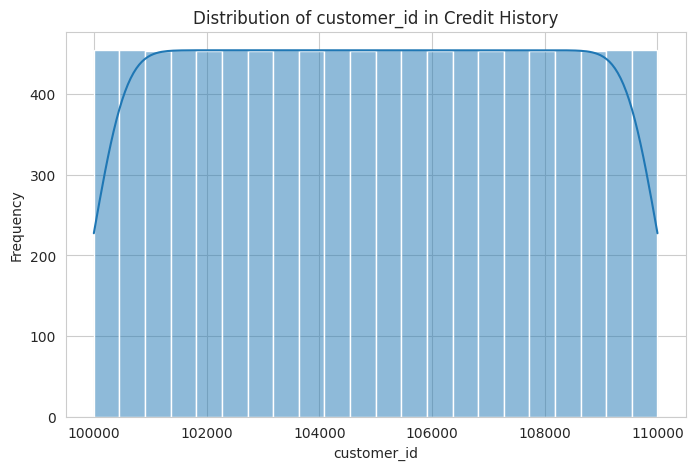

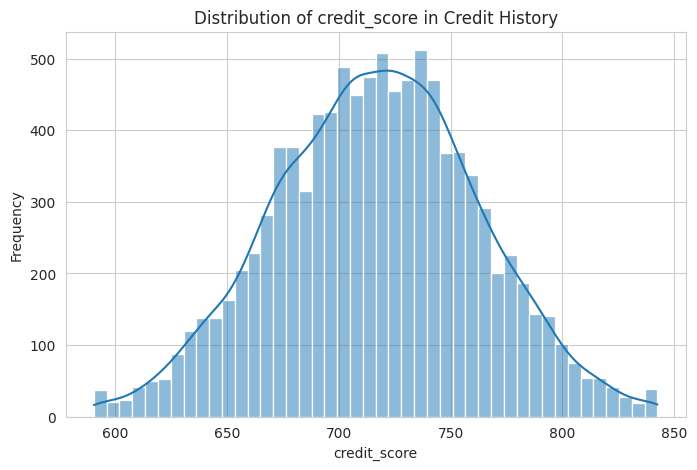

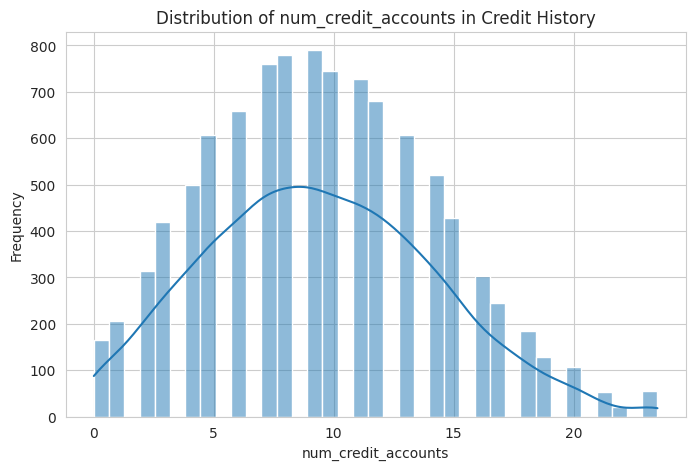

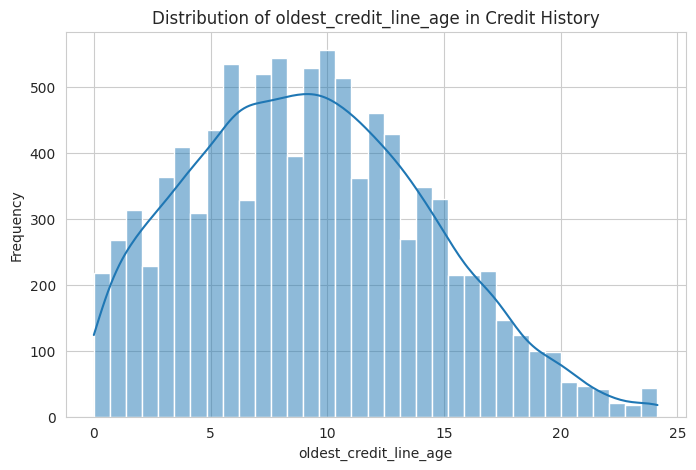

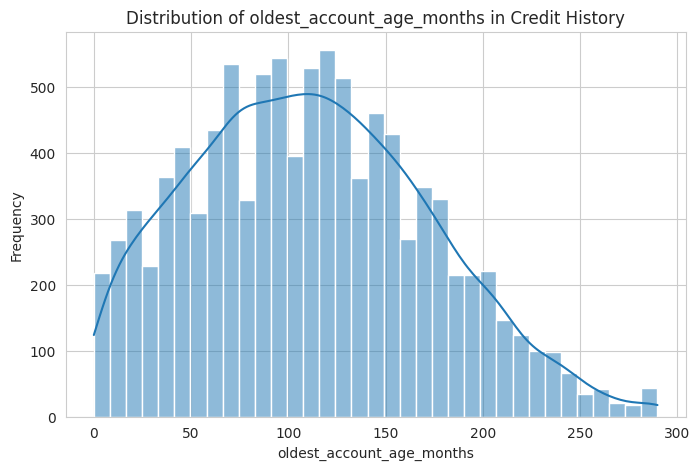

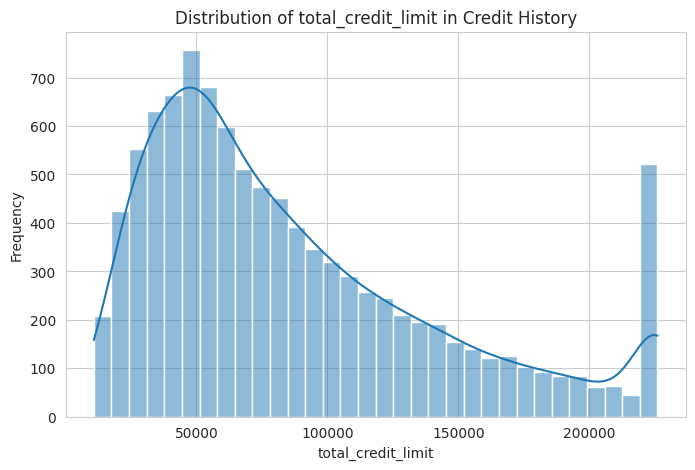

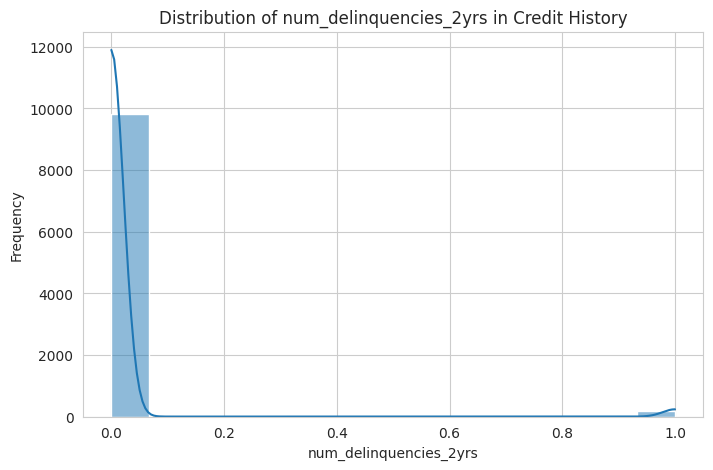

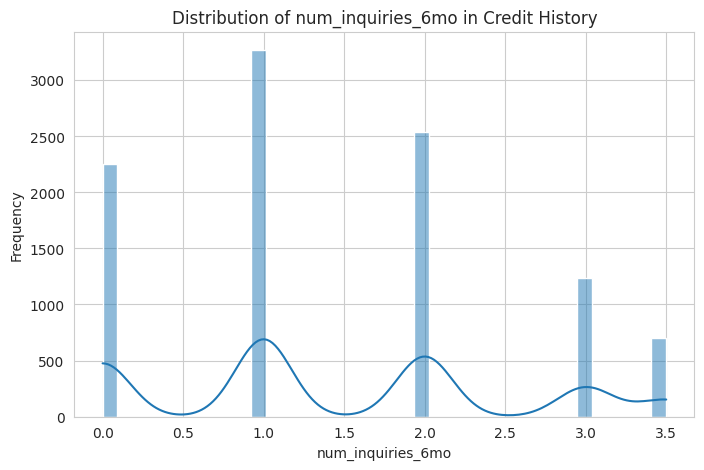

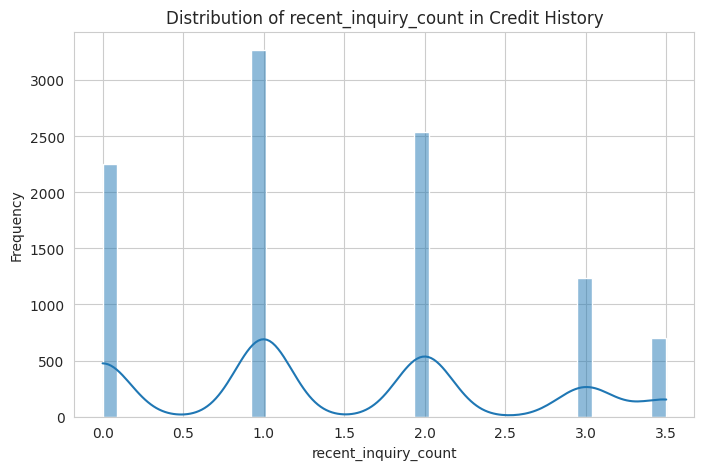

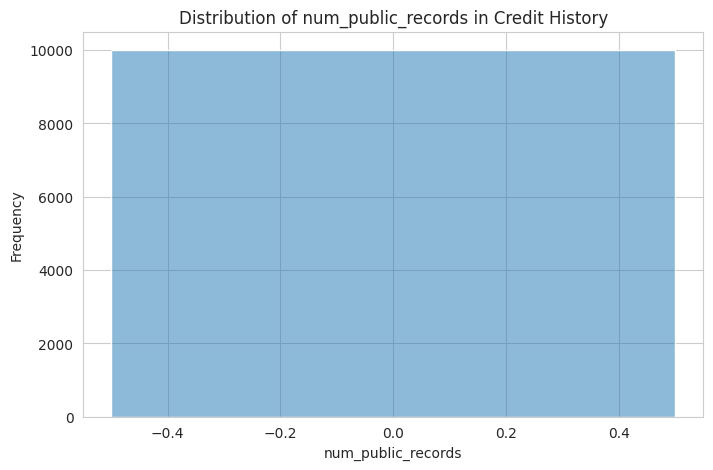

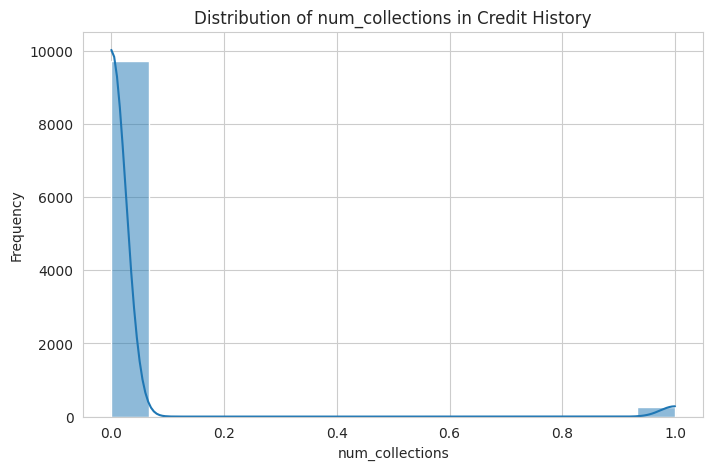

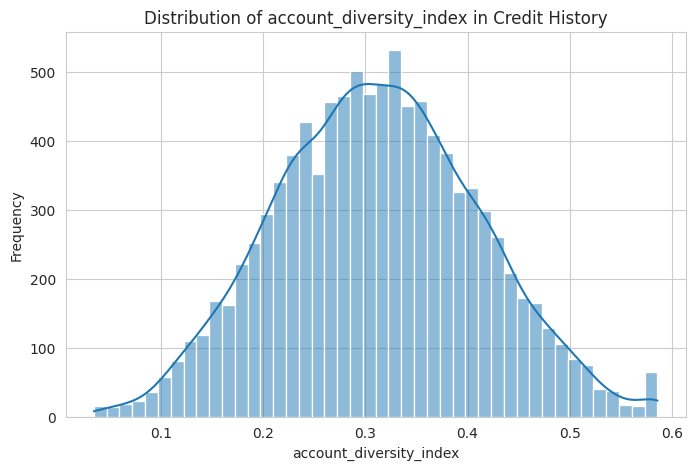

In [127]:
numerical_cols_credit = credit_history_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_credit:
    plt.figure(figsize=(8, 5))
    sns.histplot(credit_history_df[col], kde=True)
    plt.title(f'Distribution of {col} in Credit History')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

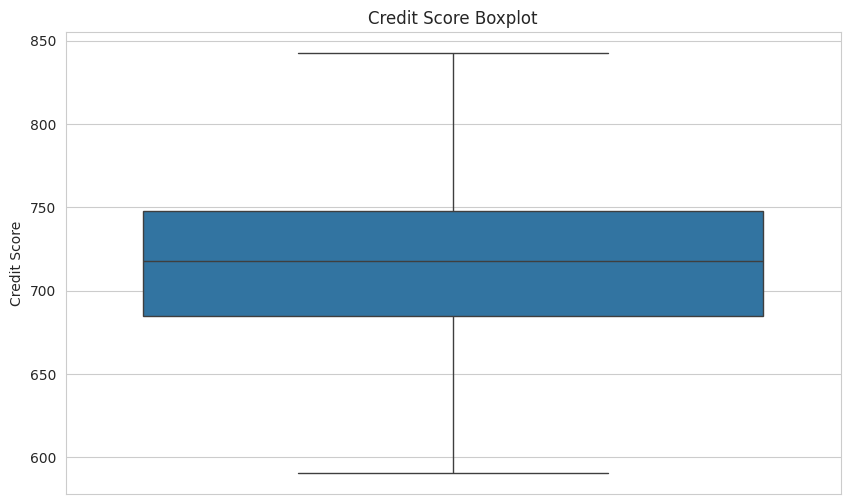

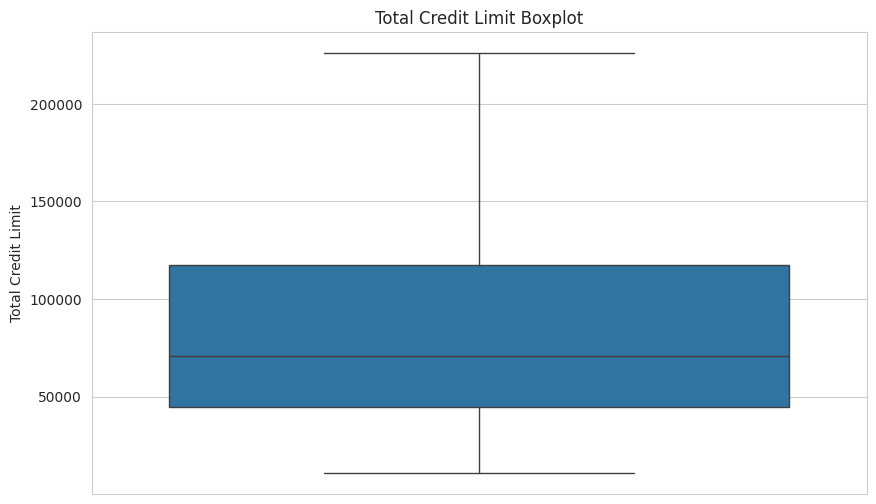

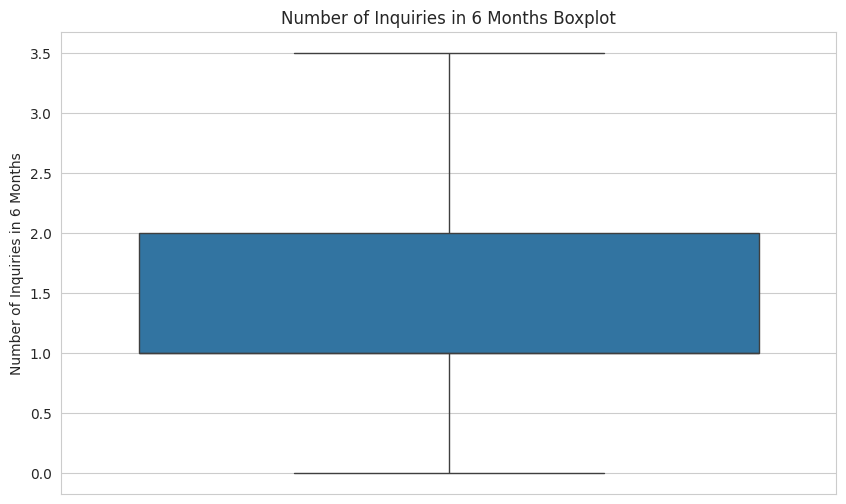

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=credit_history_df['credit_score'])
plt.title('Credit Score Boxplot')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=credit_history_df['total_credit_limit'])
plt.title('Total Credit Limit Boxplot')
plt.ylabel('Total Credit Limit')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=credit_history_df['num_inquiries_6mo'])
plt.title('Number of Inquiries in 6 Months Boxplot')
plt.ylabel('Number of Inquiries in 6 Months')
plt.show()

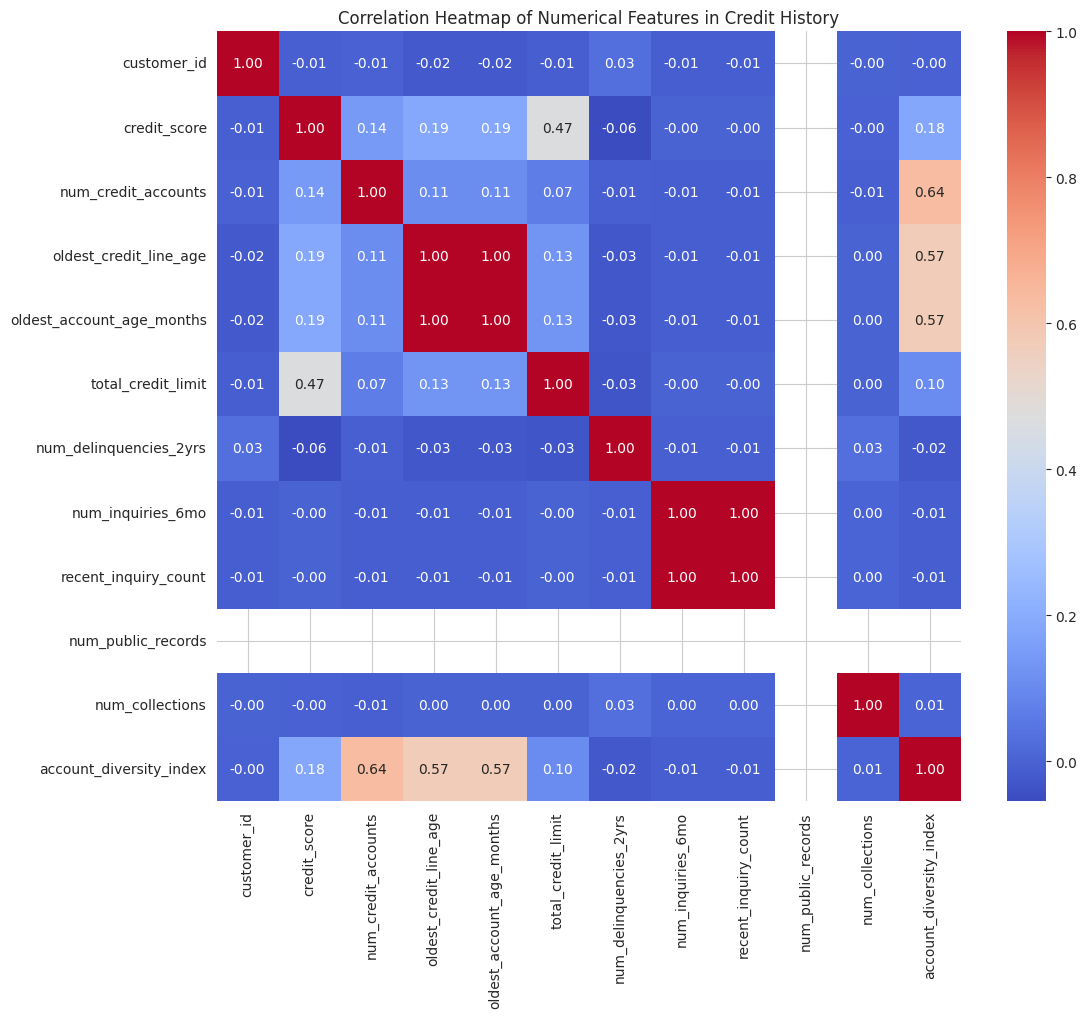

In [129]:
plt.figure(figsize=(12, 10))
corr_matrix_credit = credit_history_df[numerical_cols_credit].corr()
sns.heatmap(corr_matrix_credit, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Credit History')
plt.show()

In [130]:
credit_history_df['inquiry_rate'] = credit_history_df['recent_inquiry_count'] / (credit_history_df['oldest_credit_line_age'] + 1)
credit_history_df['delinquency_ratio'] = credit_history_df['num_delinquencies_2yrs'] / (credit_history_df['num_credit_accounts'] + 1)
credit_history_df['credit_limit_per_account'] = credit_history_df['total_credit_limit'] / (credit_history_df['num_credit_accounts'] + 1)

print("New features engineered for credit_history_df:")
display(credit_history_df.head())

New features engineered for credit_history_df:


customer_id  credit_score  num_credit_accounts  oldest_credit_line_age  \
0       100000         770.0                  8.0                     1.5   
1       100001         733.0                  7.0                    14.6   
2       100002         660.0                  0.0                     4.0   
3       100003         605.0                 14.0                     9.0   
4       100004         721.0                  5.0                     8.7   

   oldest_account_age_months  total_credit_limit  num_delinquencies_2yrs  \
0                       18.0            140600.0                     0.0   
1                      175.2             90400.0                     0.0   
2                       48.0             32400.0                     0.0   
3                      108.0             39100.0                     0.0   
4                      104.4             47900.0                     0.0   

   num_inquiries_6mo  recent_inquiry_count  num_public_records  \
0                1.0                   1.0                 0.0   
1                1.0                   1.0                 0.0   
2                3.5                   3.5                 0.0   
3                0.0                   0.0                 0.0   
4                2.0                   2.0                 0.0   

   num_collections  account_diversity_index  inquiry_rate  delinquency_ratio  \
0                0                    0.250      0.400000                0.0   
1                0                    0.284      0.064103                0.0   
2                1                    0.050      0.700000                0.0   
3                0                    0.347      0.000000                0.0   
4                0                    0.239      0.206186                0.0   

   credit_limit_per_account  
0              15622.222222  
1              11300.000000  
2              32400.000000  
3               2606.666667  
4               7983.333333

In [131]:
demographics_df = pd.read_csv('demographics.csv')

display(demographics_df.head())
print(demographics_df.info())
display(demographics_df.describe())
print(demographics_df.isnull().sum())
print("Duplicates:", demographics_df.duplicated().sum())

cust_id  age annual_income  employment_length employment_type  \
0   100000   57       $52,300               11.7   Self Employed   
1   100001   41        45,700                5.5   SELF_EMPLOYED   
2   100002   22        20,000                4.4       Part Time   
3   100003   27       $44,300                8.0       FULL_TIME   
4   100004   32       $41,100                0.9              FT   

      education marital_status  num_dependents  
0  Some College       Divorced               0  
1   High School        Married               1  
2      Graduate         Single               1  
3   High School         Single               1  
4      Bachelor         Single               3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            10001 non-null  int64  
 1   age                10001 non-null  int64  
 2   annual_income      10001 non-null  object 
 3   employment_length  9754 non-null   float64
 4   employment_type    10001 non-null  object 
 5   education          10001 non-null  object 
 6   marital_status     10001 non-null  object 
 7   num_dependents     10001 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB
None


cust_id           age  employment_length  num_dependents
count   10001.000000  10001.000000        9754.000000    10001.000000
mean   105000.000000     38.761824           5.515204        1.180782
std      2887.184355     10.850708           3.243655        1.130272
min    100000.000000     18.000000           0.000000        0.000000
25%    102500.000000     31.000000           3.000000        0.000000
50%    105000.000000     38.000000           5.200000        1.000000
75%    107500.000000     46.000000           7.600000        2.000000
max    110000.000000     74.000000          19.900000        5.000000

cust_id                0
age                    0
annual_income          0
employment_length    247
employment_type        0
education              0
marital_status         0
num_dependents         0
dtype: int64
Duplicates: 0


In [132]:
demographics_df = demographics_df.rename(columns={'cust_id': 'customer_id'})

# Clean 'annual_income' column by removing '$' and ',' and converting to float
demographics_df['annual_income'] = (
    demographics_df['annual_income']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Impute missing values in 'employment_length' with the median
median_employment_length = demographics_df['employment_length'].median()
demographics_df['employment_length'] = demographics_df['employment_length'].fillna(median_employment_length)

# Normalize text columns
for col in ['employment_type', 'education', 'marital_status']:
    demographics_df[col] = demographics_df[col].str.upper().str.strip()

# Define numerical columns for outlier capping
numerical_cols_for_outlier_demographics = [
    'age',
    'annual_income',
    'employment_length',
    'num_dependents'
]

# Cap outliers using the IQR method for numerical columns
for col in numerical_cols_for_outlier_demographics:
    Q1 = demographics_df[col].quantile(0.25)
    Q3 = demographics_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    demographics_df[col] = np.where(
        demographics_df[col] > upper_bound, upper_bound,
        np.where(demographics_df[col] < lower_bound, lower_bound, demographics_df[col])
    )

print("Demographics DataFrame after cleaning and outlier capping:")
display(demographics_df.head())
print(demographics_df.info())
print(demographics_df.isnull().sum())

Demographics DataFrame after cleaning and outlier capping:


customer_id   age  annual_income  employment_length employment_type  \
0       100000  57.0        52300.0               11.7   SELF EMPLOYED   
1       100001  41.0        45700.0                5.5   SELF_EMPLOYED   
2       100002  22.0        20000.0                4.4       PART TIME   
3       100003  27.0        44300.0                8.0       FULL_TIME   
4       100004  32.0        41100.0                0.9              FT   

      education marital_status  num_dependents  
0  SOME COLLEGE       DIVORCED             0.0  
1   HIGH SCHOOL        MARRIED             1.0  
2      GRADUATE         SINGLE             1.0  
3   HIGH SCHOOL         SINGLE             1.0  
4      BACHELOR         SINGLE             3.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10001 non-null  int64  
 1   age                10001 non-null  float64
 2   annual_income      10001 non-null  float64
 3   employment_length  10001 non-null  float64
 4   employment_type    10001 non-null  object 
 5   education          10001 non-null  object 
 6   marital_status     10001 non-null  object 
 7   num_dependents     10001 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 625.2+ KB
None
customer_id          0
age                  0
annual_income        0
employment_length    0
employment_type      0
education            0
marital_status       0
num_dependents       0
dtype: int64


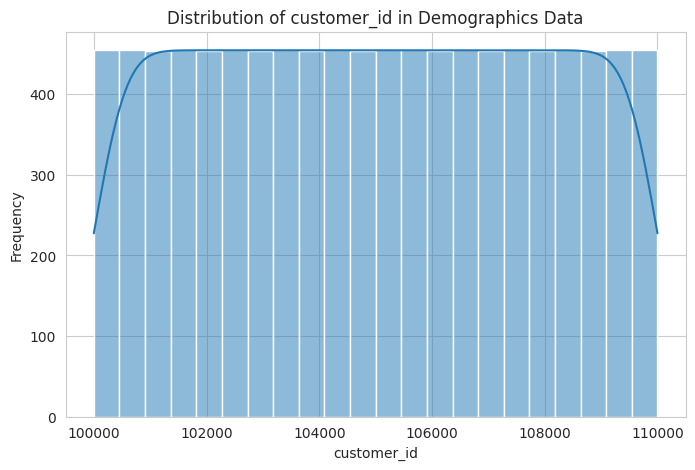

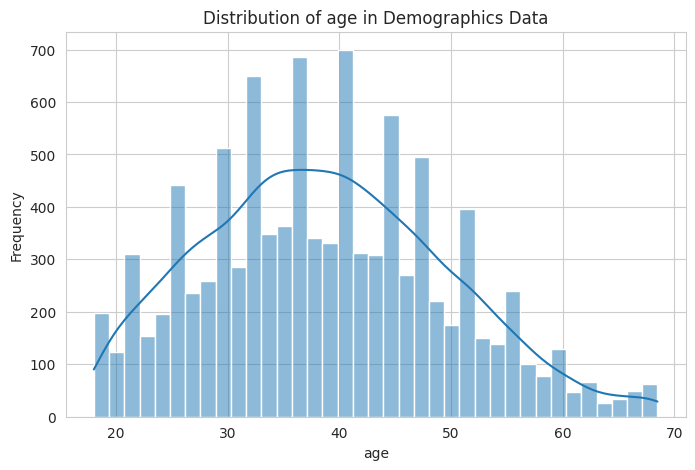

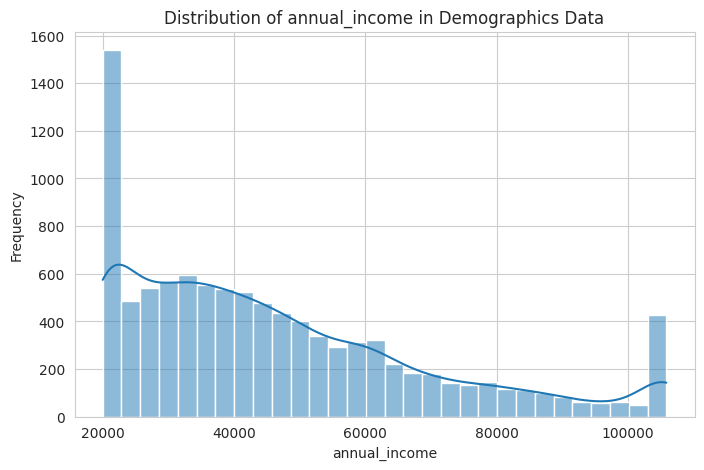

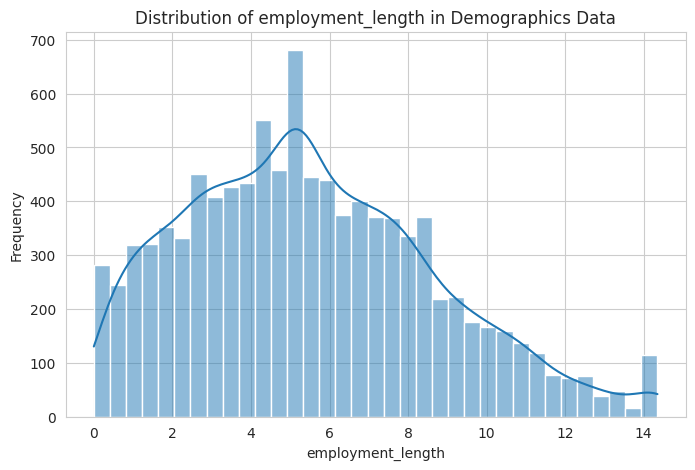

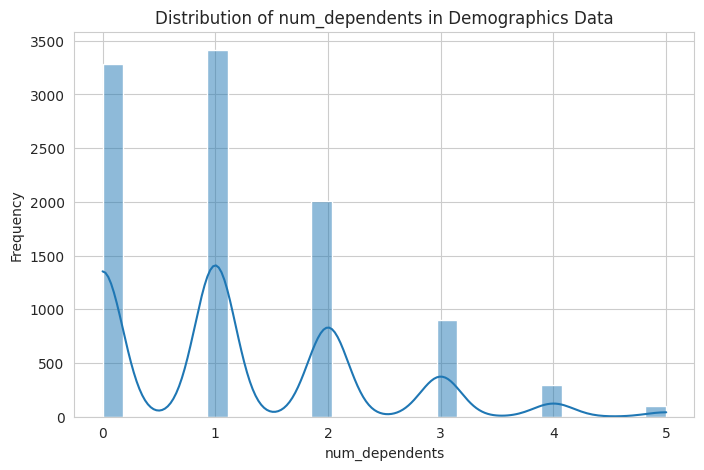

In [133]:
numerical_cols_demographics = demographics_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_demographics:
    plt.figure(figsize=(8, 5))
    sns.histplot(demographics_df[col], kde=True)
    plt.title(f'Distribution of {col} in Demographics Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

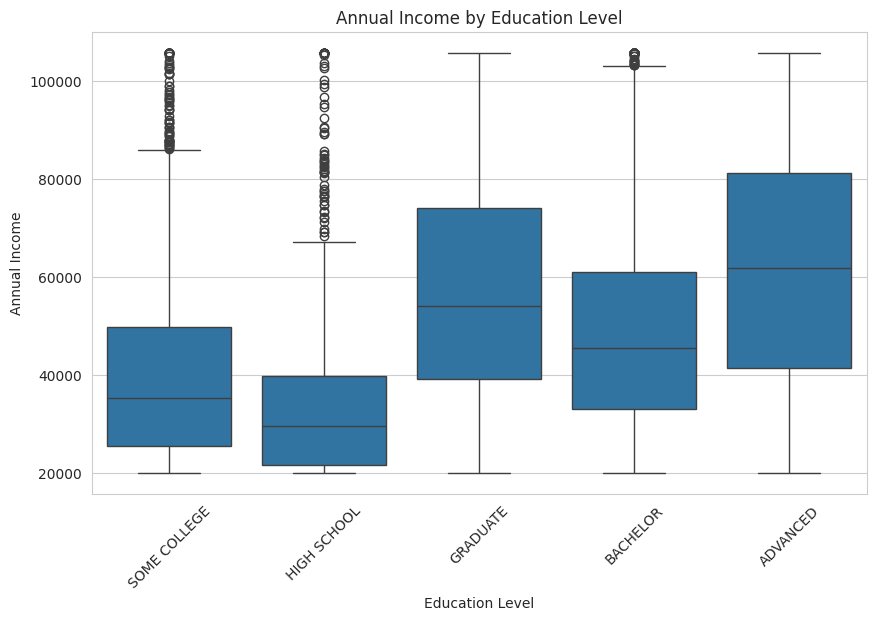

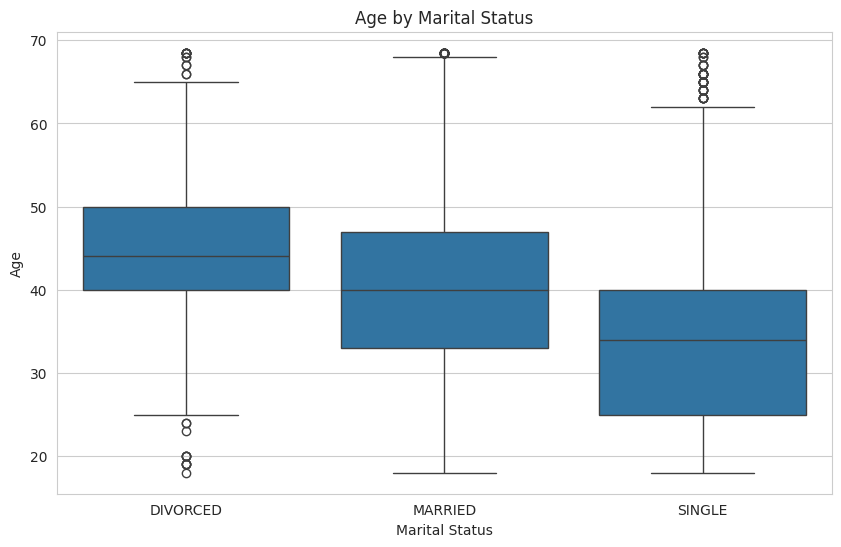

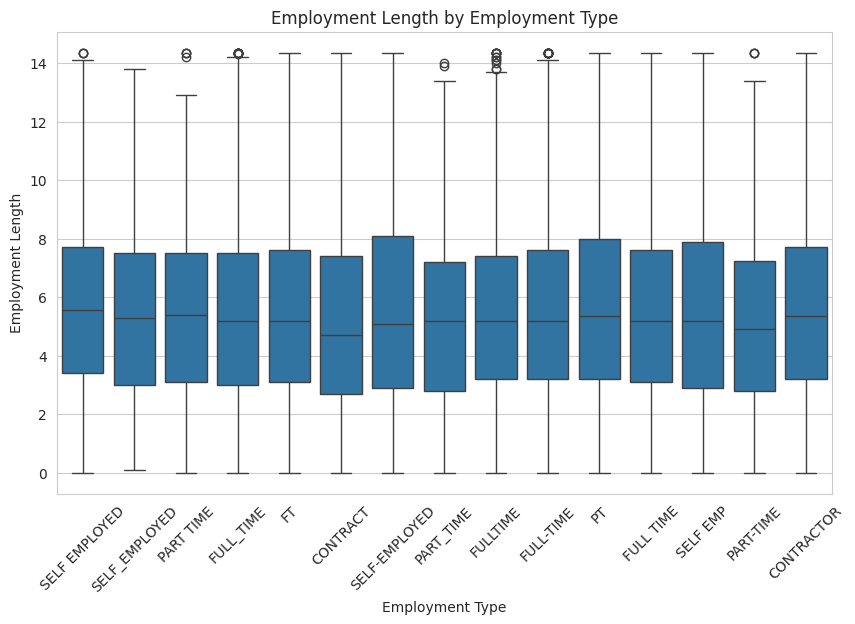

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='annual_income', data=demographics_df)
plt.title('Annual Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='age', data=demographics_df)
plt.title('Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='employment_length', data=demographics_df)
plt.title('Employment Length by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Employment Length')
plt.xticks(rotation=45)
plt.show()

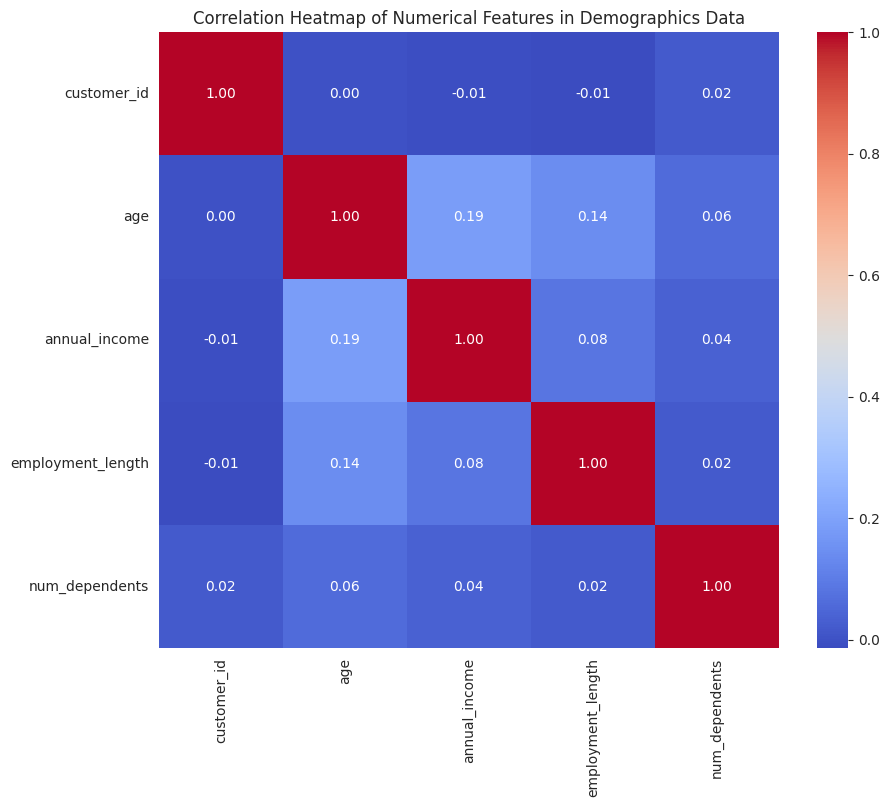

In [135]:
plt.figure(figsize=(10, 8))
corr_matrix_demographics = demographics_df[numerical_cols_demographics].corr()
sns.heatmap(corr_matrix_demographics, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Demographics Data')
plt.show()

In [136]:
demographics_df['income_per_dependent'] = demographics_df['annual_income'] / (demographics_df['num_dependents'] + 1)
demographics_df['age_employment_ratio'] = demographics_df['age'] / (demographics_df['employment_length'] + 1)

categorical_cols_demographics_encode = ['employment_type', 'education', 'marital_status']
demographics_df = pd.get_dummies(demographics_df, columns=categorical_cols_demographics_encode, drop_first=True, dtype=int)

print("New features engineered and categorical variables encoded for demographics_df:")
display(demographics_df.head())
print(demographics_df.info())

New features engineered and categorical variables encoded for demographics_df:


customer_id   age  annual_income  employment_length  num_dependents  \
0       100000  57.0        52300.0               11.7             0.0   
1       100001  41.0        45700.0                5.5             1.0   
2       100002  22.0        20000.0                4.4             1.0   
3       100003  27.0        44300.0                8.0             1.0   
4       100004  32.0        41100.0                0.9             3.0   

   income_per_dependent  age_employment_ratio  employment_type_CONTRACTOR  \
0               52300.0              4.488189                           0   
1               22850.0              6.307692                           0   
2               10000.0              4.074074                           0   
3               22150.0              3.000000                           0   
4               10275.0             16.842105                           0   

   employment_type_FT  employment_type_FULL TIME  ...  \
0                   0                          0  ...   
1                   0                          0  ...   
2                   0                          0  ...   
3                   0                          0  ...   
4                   1                          0  ...   

   employment_type_SELF EMP  employment_type_SELF EMPLOYED  \
0                         0                              1   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   employment_type_SELF-EMPLOYED  employment_type_SELF_EMPLOYED  \
0                              0                              0   
1                              0                              1   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   education_BACHELOR  education_GRADUATE  education_HIGH SCHOOL  \
0                   0                   0                      0   
1                   0                   0                      1   
2                   0                   1                      0   
3                   0                   0                      1   
4                   1                   0                      0   

   education_SOME COLLEGE  marital_status_MARRIED  marital_status_SINGLE  
0                       1                       0                      0  
1                       0                       1                      0  
2                       0                       0                      1  
3                       0                       0                      1  
4                       0                       0                      1  

[5 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    10001 non-null  int64  
 1   age                            10001 non-null  float64
 2   annual_income                  10001 non-null  float64
 3   employment_length              10001 non-null  float64
 4   num_dependents                 10001 non-null  float64
 5   income_per_dependent           10001 non-null  float64
 6   age_employment_ratio           10001 non-null  float64
 7   employment_type_CONTRACTOR     10001 non-null  int64  
 8   employment_type_FT             10001 non-null  int64  
 9   employment_type_FULL TIME      10001 non-null  int64  
 10  employment_type_FULL-TIME      10001 non-null  int64  
 11  employment_type_FULLTIME       10001 non-null  int64  
 12  employment_type_FULL_TIME      10001 non-null 

In [139]:
**Reasoning**:
I have completed the cleaning, EDA, and feature engineering for `demographics_df`. The next step in the overall task is to load and process the `financial_ratios.jsonl` file. I will load the file, display its head, info, describe, null counts, and duplicate counts as part of the initial inspection.

SyntaxError: invalid syntax (ipython-input-1041213135.py, line 1)

In [138]:
financial_ratios_df = pd.read_json('financial_ratios.jsonl', lines=True)

display(financial_ratios_df.head())
print(financial_ratios_df.info())
display(financial_ratios_df.describe())
print(financial_ratios_df.isnull().sum())
print("Duplicates:", financial_ratios_df.duplicated().sum())

cust_num monthly_income existing_monthly_debt monthly_payment  \
0    100000          $4358             $1,024.36          522.79   
1    100001       3,808.33             $1,206.09         $204.00   
2    100002       1,666.67               $259.53          102.00   
3    100003       3,691.67              1,117.20           360.0   
4    100004      $3,425.00               $712.04       $1,860.30   

   debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                 0.355            0.354987                    0.120   
1                 0.370            0.370264                    0.054   
2                 0.217            0.216918                    0.061   
3                 0.400            0.400144                    0.098   
4                 0.751            0.751048                    0.543   

   credit_utilization revolving_balance credit_usage_amount available_credit  \
0               0.354        $49,772.40           49,772.40       $90,827.60   
1               0.282         25,492.80          $25,492.80       $64,907.20   
2               0.377           12214.8           12,214.80       $20,185.20   
3               0.365         14,271.50           14,271.50       $24,828.50   
4               0.490        $23,471.00          $23,471.00       $24,429.00   

  total_monthly_debt_payment  annual_debt_payment  loan_to_annual_income  \
0         1547.1499999999999             18565.80               0.216061   
1                    1410.09             16921.08               0.148796   
2                     361.53              4338.36               0.170000   
3                   1,477.20             17726.40               0.270880   
4                   2,572.34             30868.08               6.810219   

  total_debt_amount monthly_free_cash_flow  
0        $61,072.40               2,811.18  
1        $32,292.80              $2,398.24  
2         15,614.80               1,305.14  
3         26,271.50               2,214.47  
4          303371.0                $852.66

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_num                    10001 non-null  int64  
 1   monthly_income              10001 non-null  object 
 2   existing_monthly_debt       10001 non-null  object 
 3   monthly_payment             10001 non-null  object 
 4   debt_to_income_ratio        10001 non-null  float64
 5   debt_service_ratio          10001 non-null  float64
 6   payment_to_income_ratio     10001 non-null  float64
 7   credit_utilization          10001 non-null  float64
 8   revolving_balance           9846 non-null   object 
 9   credit_usage_amount         10001 non-null  object 
 10  available_credit            10001 non-null  object 
 11  total_monthly_debt_payment  10001 non-null  object 
 12  annual_debt_payment         10001 non-null  float64
 13  loan_to_annual_income       100

cust_num  debt_to_income_ratio  debt_service_ratio  \
count   10001.000000          10001.000000        10001.000000   
mean   105000.000000              0.527259            0.527259   
std      2887.184355              0.377276            0.377276   
min    100000.000000              0.059000            0.059162   
25%    102500.000000              0.295000            0.295284   
50%    105000.000000              0.422000            0.422333   
75%    107500.000000              0.631000            0.631442   
max    110000.000000              4.301000            4.300944   

       payment_to_income_ratio  credit_utilization  annual_debt_payment  \
count             10001.000000        10001.000000         10001.000000   
mean                  0.302640            0.443172         21721.544786   
std                   0.362269            0.182487         13299.077641   
min                   0.002000            0.021000          1291.680000   
25%                   0.077000            0.311000         11652.360000   
50%                   0.168000            0.437000         18234.000000   
75%                   0.383000            0.567000         29009.400000   
max                   4.184000            1.000000        113855.040000   

       loan_to_annual_income  
count           10001.000000  
mean                2.835687  
std                 4.563491  
min                 0.007802  
25%                 0.217687  
50%                 0.507937  
75%                 3.986348  
max                36.635000

cust_num                        0
monthly_income                  0
existing_monthly_debt           0
monthly_payment                 0
debt_to_income_ratio            0
debt_service_ratio              0
payment_to_income_ratio         0
credit_utilization              0
revolving_balance             155
credit_usage_amount             0
available_credit                0
total_monthly_debt_payment      0
annual_debt_payment             0
loan_to_annual_income           0
total_debt_amount               0
monthly_free_cash_flow          0
dtype: int64
Duplicates: 0


In [140]:
financial_ratios_df = financial_ratios_df.rename(columns={'cust_num': 'customer_id'})

currency_cols_financial = [
    'monthly_income', 'existing_monthly_debt', 'monthly_payment',
    'revolving_balance', 'credit_usage_amount', 'available_credit',
    'total_monthly_debt_payment', 'total_debt_amount',
    'monthly_free_cash_flow'
]

for col in currency_cols_financial:
    # Ensure column is treated as string to apply .str methods
    financial_ratios_df[col] = financial_ratios_df[col].astype(str)
    # Remove '$' and ',' then convert to numeric, coercing errors to NaN
    financial_ratios_df[col] = pd.to_numeric(
        financial_ratios_df[col]
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False),
        errors='coerce'
    )

# Impute missing values after conversion (especially for 'revolving_balance' and any 'None' converted to NaN)
num_cols_financial = financial_ratios_df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols_financial:
    if financial_ratios_df[col].isnull().any():
        median_val = financial_ratios_df[col].median()
        financial_ratios_df[col] = financial_ratios_df[col].fillna(median_val)

# Cap outliers using IQR method for numerical columns
numerical_cols_for_outlier_financial = financial_ratios_df.select_dtypes(include=['int64', 'float64']).columns.drop('customer_id')

for col in numerical_cols_for_outlier_financial:
    Q1 = financial_ratios_df[col].quantile(0.25)
    Q3 = financial_ratios_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    financial_ratios_df[col] = np.where(
        financial_ratios_df[col] > upper_bound, upper_bound,
        np.where(financial_ratios_df[col] < lower_bound, lower_bound, financial_ratios_df[col])
    )

print("Financial Ratios DataFrame after cleaning and outlier capping:")
display(financial_ratios_df.head())
print(financial_ratios_df.info())
print(financial_ratios_df.isnull().sum())

Financial Ratios DataFrame after cleaning and outlier capping:


customer_id  monthly_income  existing_monthly_debt  monthly_payment  \
0       100000         4358.00                1024.36           522.79   
1       100001         3808.33                1206.09           204.00   
2       100002         1666.67                 259.53           102.00   
3       100003         3691.67                1117.20           360.00   
4       100004         3425.00                 712.04          1860.30   

   debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                 0.355            0.354987                    0.120   
1                 0.370            0.370264                    0.054   
2                 0.217            0.216918                    0.061   
3                 0.400            0.400144                    0.098   
4                 0.751            0.751048                    0.543   

   credit_utilization  revolving_balance  credit_usage_amount  \
0               0.354            49772.4              49772.4   
1               0.282            25492.8              25492.8   
2               0.377            12214.8              12214.8   
3               0.365            14271.5              14271.5   
4               0.490            23471.0              23471.0   

   available_credit  total_monthly_debt_payment  annual_debt_payment  \
0           90827.6                     1547.15             18565.80   
1           64907.2                     1410.09             16921.08   
2           20185.2                      361.53              4338.36   
3           24828.5                     1477.20             17726.40   
4           24429.0                     2572.34             30868.08   

   loan_to_annual_income  total_debt_amount  monthly_free_cash_flow  
0               0.216061            61072.4                 2811.18  
1               0.148796            32292.8                 2398.24  
2               0.170000            15614.8                 1305.14  
3               0.270880            26271.5                 2214.47  
4               6.810219           303371.0                  852.66

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10001 non-null  int64  
 1   monthly_income              10001 non-null  float64
 2   existing_monthly_debt       10001 non-null  float64
 3   monthly_payment             10001 non-null  float64
 4   debt_to_income_ratio        10001 non-null  float64
 5   debt_service_ratio          10001 non-null  float64
 6   payment_to_income_ratio     10001 non-null  float64
 7   credit_utilization          10001 non-null  float64
 8   revolving_balance           10001 non-null  float64
 9   credit_usage_amount         10001 non-null  float64
 10  available_credit            10001 non-null  float64
 11  total_monthly_debt_payment  10001 non-null  float64
 12  annual_debt_payment         10001 non-null  float64
 13  loan_to_annual_income       100

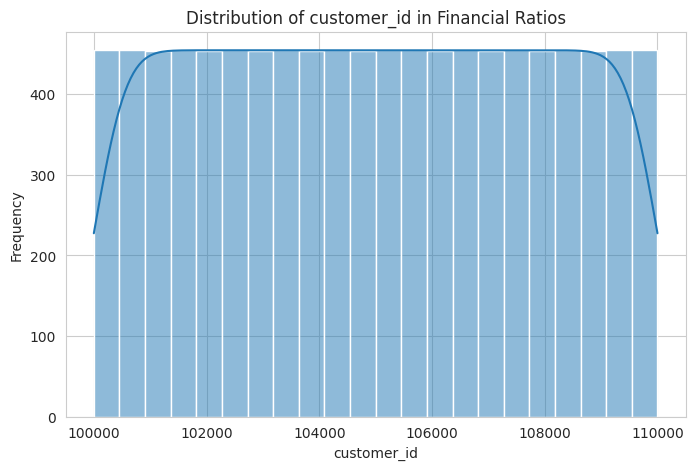

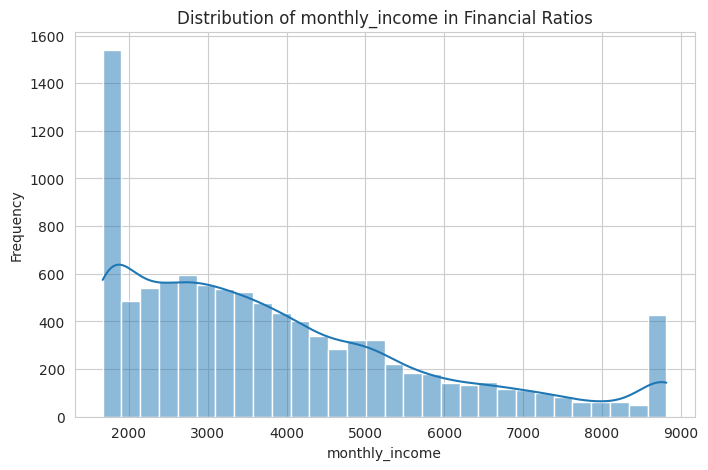

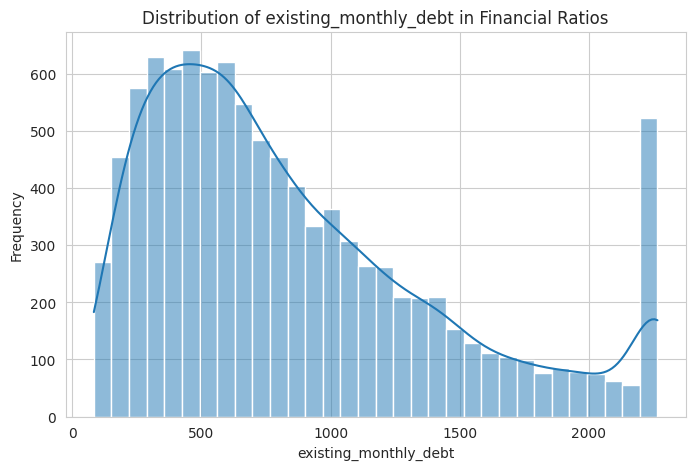

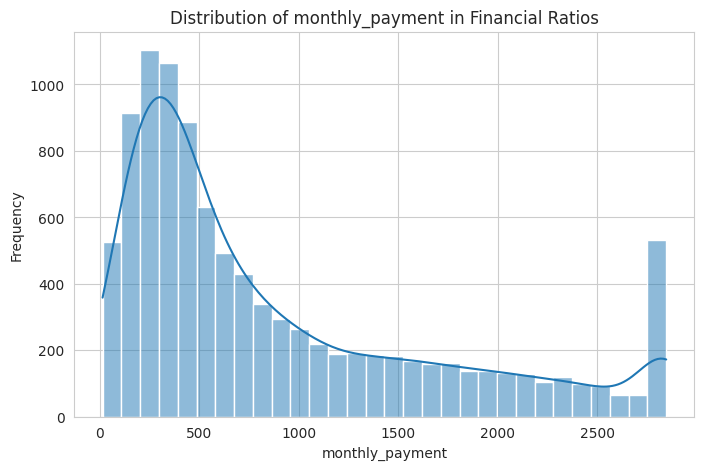

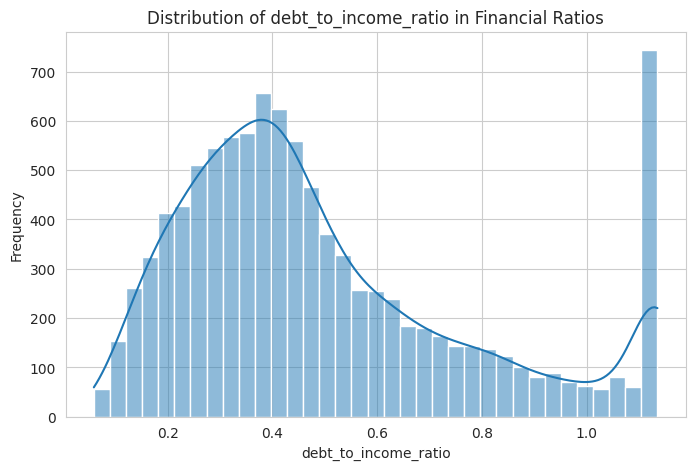

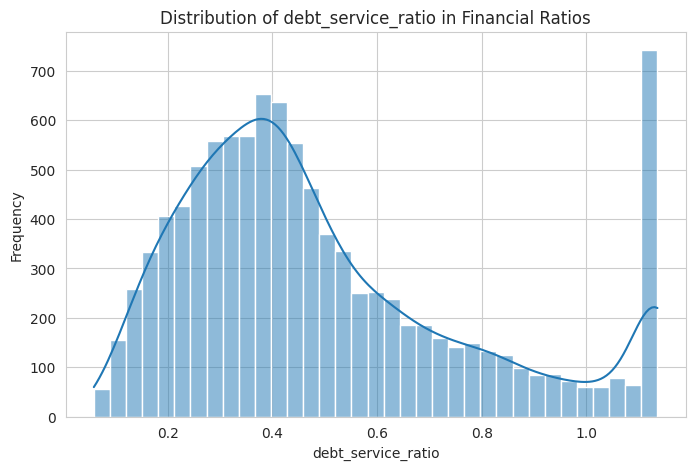

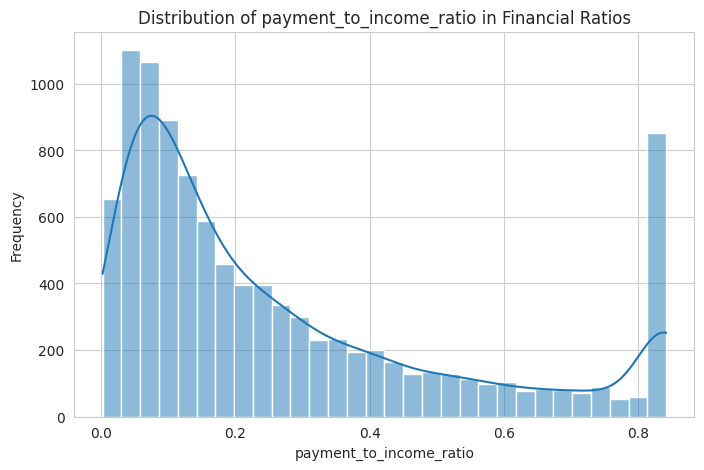

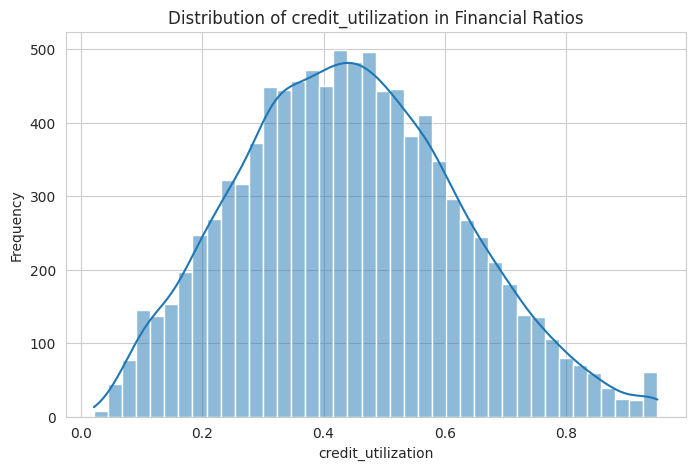

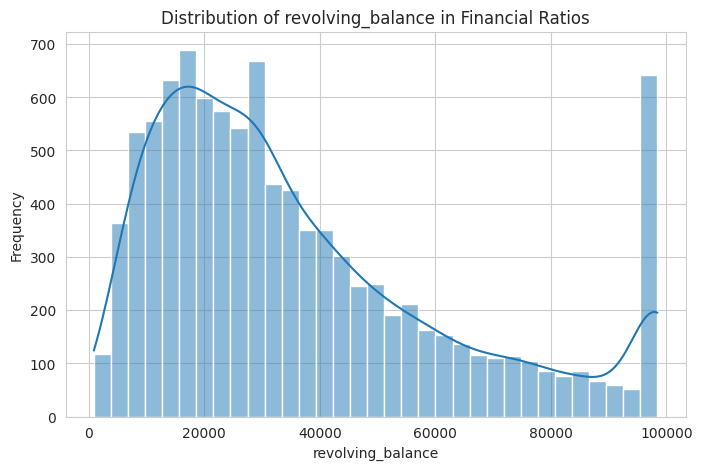

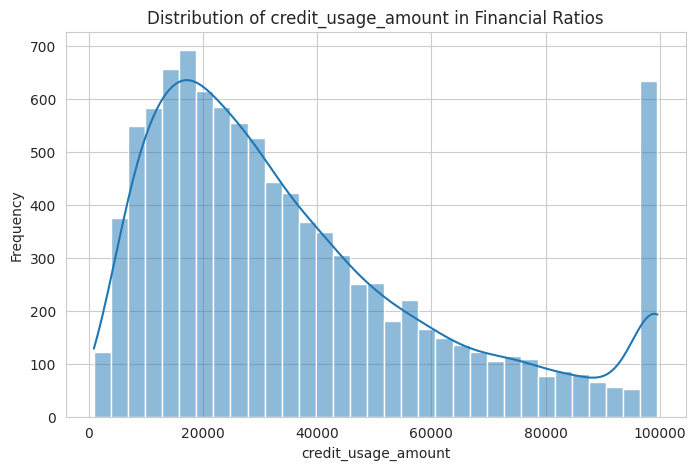

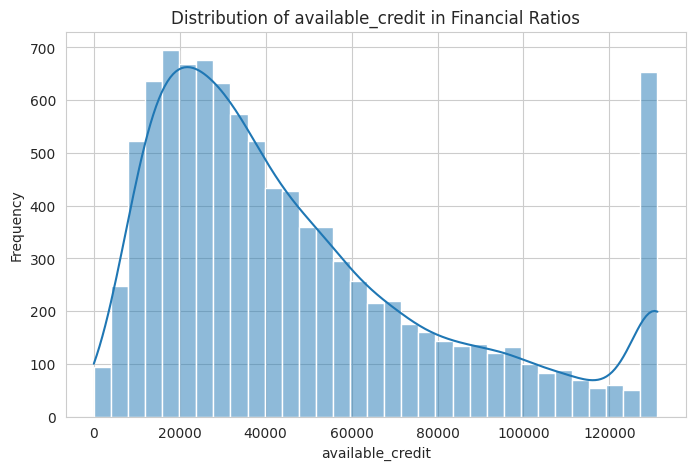

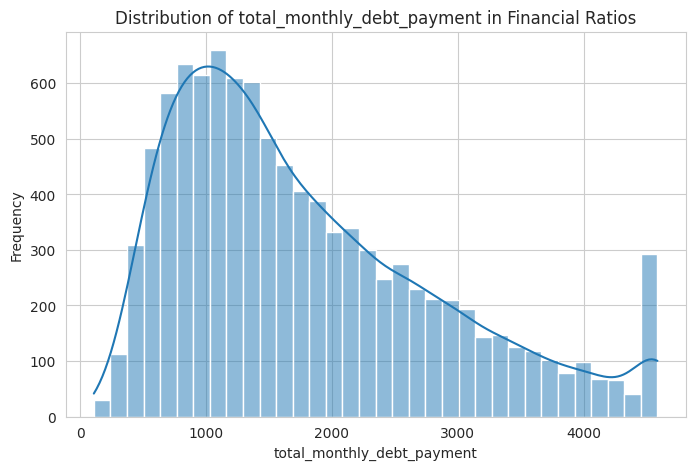

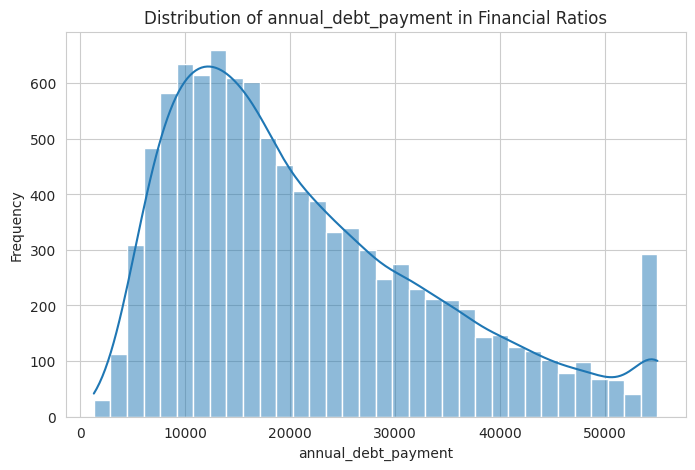

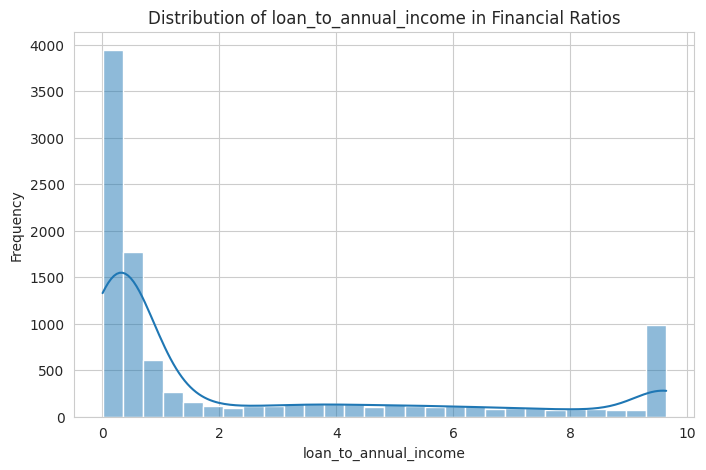

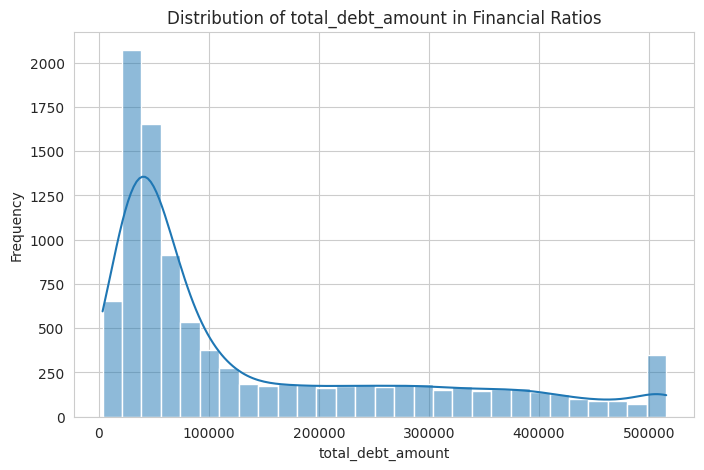

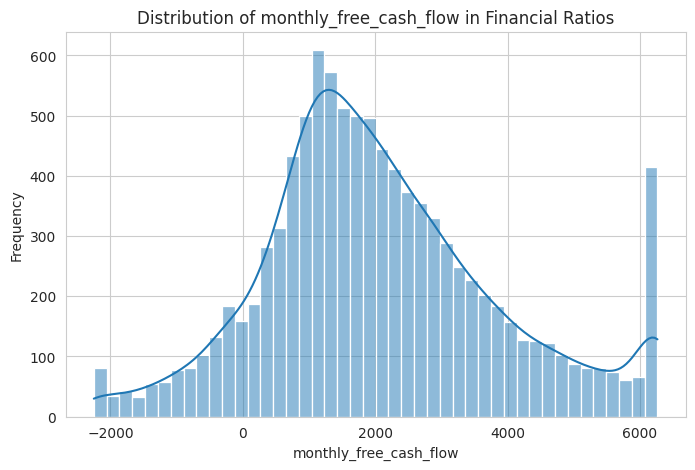

In [141]:
numerical_cols_financial_eda = financial_ratios_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_financial_eda:
    plt.figure(figsize=(8, 5))
    sns.histplot(financial_ratios_df[col], kde=True)
    plt.title(f'Distribution of {col} in Financial Ratios')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

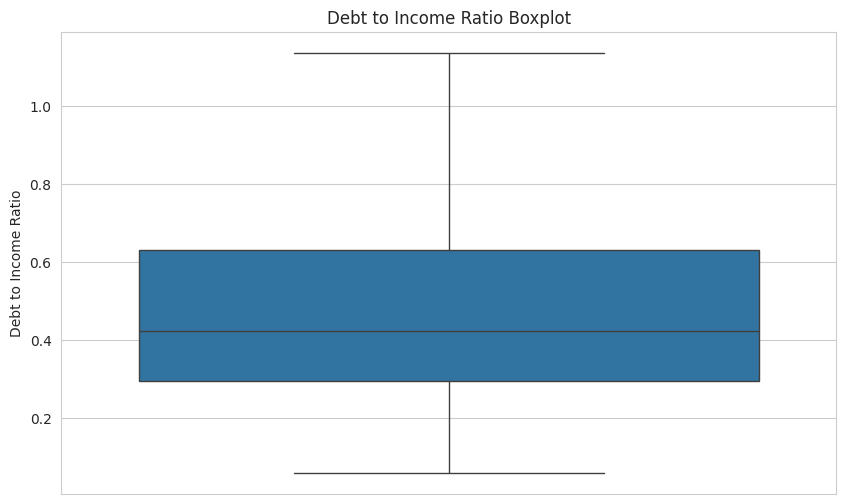

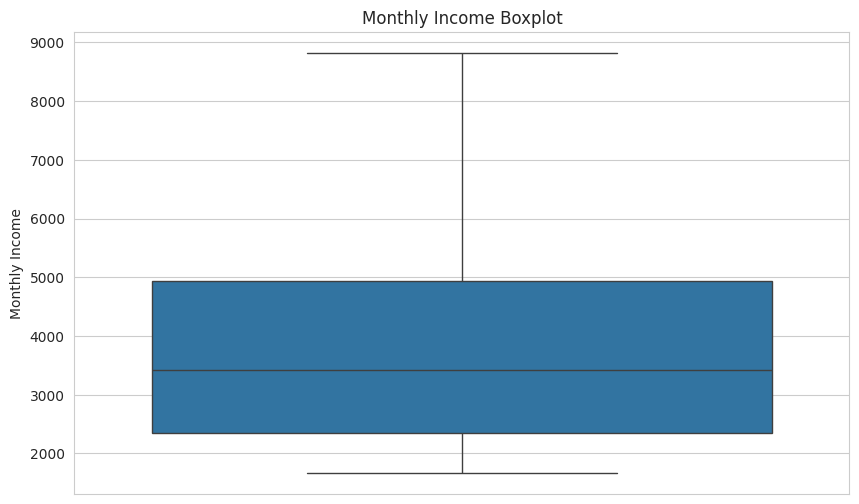

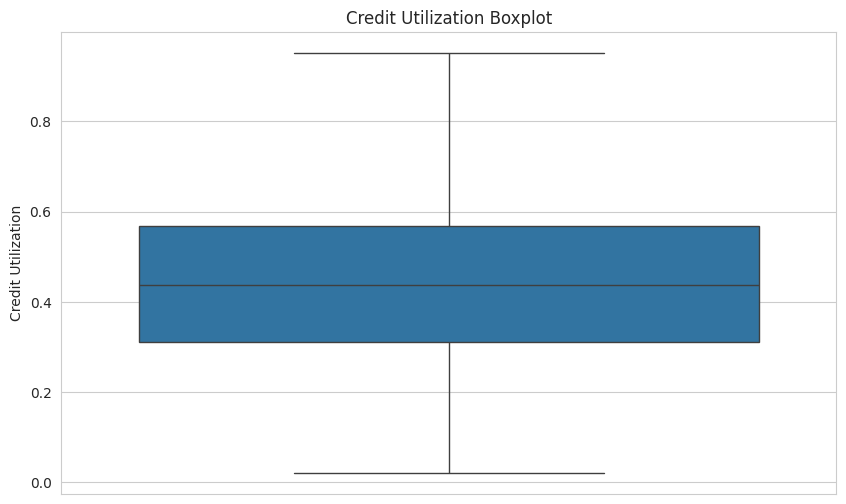

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=financial_ratios_df['debt_to_income_ratio'])
plt.title('Debt to Income Ratio Boxplot')
plt.ylabel('Debt to Income Ratio')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=financial_ratios_df['monthly_income'])
plt.title('Monthly Income Boxplot')
plt.ylabel('Monthly Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=financial_ratios_df['credit_utilization'])
plt.title('Credit Utilization Boxplot')
plt.ylabel('Credit Utilization')
plt.show()

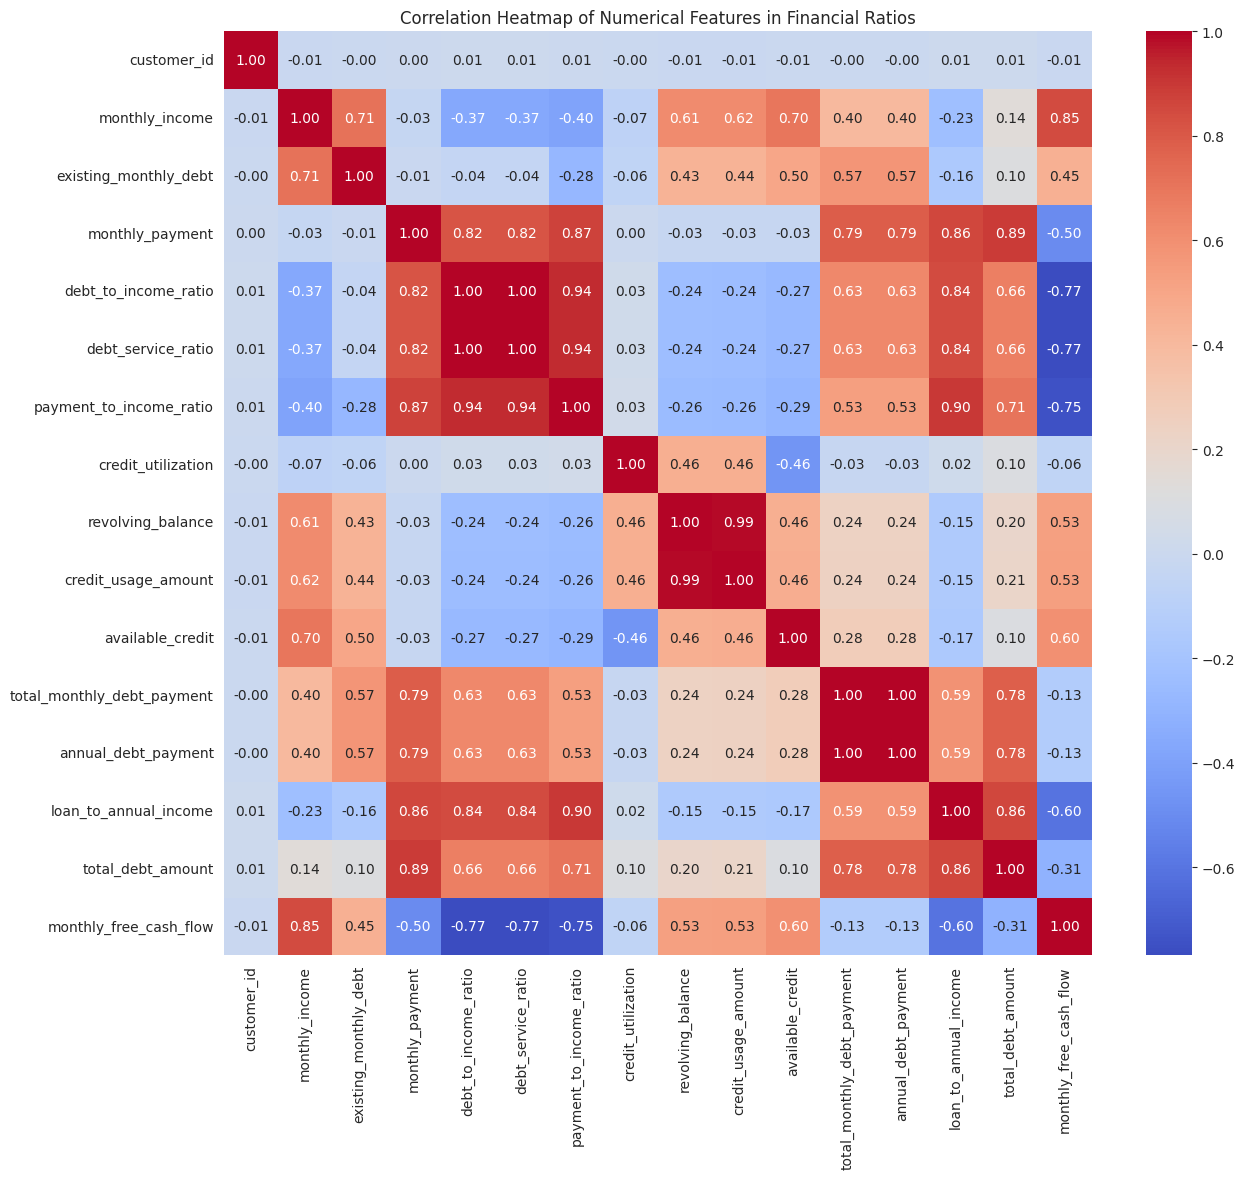

In [143]:
plt.figure(figsize=(14, 12))
corr_matrix_financial = financial_ratios_df[numerical_cols_financial_eda].corr()
sns.heatmap(corr_matrix_financial, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Financial Ratios')
plt.show()

In [144]:
financial_ratios_df['monthly_debt_ratio'] = financial_ratios_df['existing_monthly_debt'] / (financial_ratios_df['monthly_income'] + 1)
financial_ratios_df['income_to_credit_ratio'] = financial_ratios_df['monthly_income'] / (financial_ratios_df['total_debt_amount'] + 1)
financial_ratios_df['free_cash_flow_ratio'] = financial_ratios_df['monthly_free_cash_flow'] / (financial_ratios_df['monthly_income'] + 1)

print("New features engineered for financial_ratios_df:")
display(financial_ratios_df.head())
print(financial_ratios_df.info())

New features engineered for financial_ratios_df:


customer_id  monthly_income  existing_monthly_debt  monthly_payment  \
0       100000         4358.00                1024.36           522.79   
1       100001         3808.33                1206.09           204.00   
2       100002         1666.67                 259.53           102.00   
3       100003         3691.67                1117.20           360.00   
4       100004         3425.00                 712.04          1860.30   

   debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                 0.355            0.354987                    0.120   
1                 0.370            0.370264                    0.054   
2                 0.217            0.216918                    0.061   
3                 0.400            0.400144                    0.098   
4                 0.751            0.751048                    0.543   

   credit_utilization  revolving_balance  credit_usage_amount  \
0               0.354            49772.4              49772.4   
1               0.282            25492.8              25492.8   
2               0.377            12214.8              12214.8   
3               0.365            14271.5              14271.5   
4               0.490            23471.0              23471.0   

   available_credit  total_monthly_debt_payment  annual_debt_payment  \
0           90827.6                     1547.15             18565.80   
1           64907.2                     1410.09             16921.08   
2           20185.2                      361.53              4338.36   
3           24828.5                     1477.20             17726.40   
4           24429.0                     2572.34             30868.08   

   loan_to_annual_income  total_debt_amount  monthly_free_cash_flow  \
0               0.216061            61072.4                 2811.18   
1               0.148796            32292.8                 2398.24   
2               0.170000            15614.8                 1305.14   
3               0.270880            26271.5                 2214.47   
4               6.810219           303371.0                  852.66   

   monthly_debt_ratio  income_to_credit_ratio  free_cash_flow_ratio  
0            0.234999                0.071357              0.644914  
1            0.316615                0.117928              0.629570  
2            0.155624                0.106730              0.782613  
3            0.302545                0.140515              0.599693  
4            0.207834                0.011290              0.248879

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10001 non-null  int64  
 1   monthly_income              10001 non-null  float64
 2   existing_monthly_debt       10001 non-null  float64
 3   monthly_payment             10001 non-null  float64
 4   debt_to_income_ratio        10001 non-null  float64
 5   debt_service_ratio          10001 non-null  float64
 6   payment_to_income_ratio     10001 non-null  float64
 7   credit_utilization          10001 non-null  float64
 8   revolving_balance           10001 non-null  float64
 9   credit_usage_amount         10001 non-null  float64
 10  available_credit            10001 non-null  float64
 11  total_monthly_debt_payment  10001 non-null  float64
 12  annual_debt_payment         10001 non-null  float64
 13  loan_to_annual_income       100

In [145]:
geographic_data_df = pd.read_xml('geographic_data.xml')

display(geographic_data_df.head())
print(geographic_data_df.info())
display(geographic_data_df.describe())
print(geographic_data_df.isnull().sum())
print("Duplicates:", geographic_data_df.duplicated().sum())

id state  regional_unemployment_rate  regional_median_income  \
0  100000    TN                         4.1                   53000   
1  100001    CA                         5.6                   75000   
2  100002    NY                         4.9                   72000   
3  100003    MA                         4.0                   81000   
4  100004    IL                         4.8                   65000   

   regional_median_rent  housing_price_index  cost_of_living_index  \
0                1400.0                 99.0                  73.0   
1                1580.0                161.0                 130.0   
2                1740.0                138.0                 118.0   
3                1770.0                140.0                 116.0   
4                1520.0                 96.0                  86.0   

   previous_zip_code  
0                390  
1                292  
2                552  
3                716  
4                559

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10001 non-null  int64  
 1   state                       10001 non-null  object 
 2   regional_unemployment_rate  10001 non-null  float64
 3   regional_median_income      10001 non-null  int64  
 4   regional_median_rent        10001 non-null  float64
 5   housing_price_index         10001 non-null  float64
 6   cost_of_living_index        10001 non-null  float64
 7   previous_zip_code           10001 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 625.2+ KB
None


id  regional_unemployment_rate  regional_median_income  \
count   10001.000000                10001.000000            10001.000000   
mean   105000.000000                    4.678752            64790.320968   
std      2887.184355                    0.596266             9569.583602   
min    100000.000000                    2.900000            53000.000000   
25%    102500.000000                    4.200000            56000.000000   
50%    105000.000000                    4.600000            61000.000000   
75%    107500.000000                    5.100000            75000.000000   
max    110000.000000                    6.400000            84000.000000   

       regional_median_rent  housing_price_index  cost_of_living_index  \
count          10001.000000         10001.000000          10001.000000   
mean            1552.640736           118.944406             97.194981   
std              268.087926            23.549903             18.078666   
min              970.000000            73.000000             57.000000   
25%             1340.000000           100.000000             83.000000   
50%             1500.000000           111.000000             91.000000   
75%             1750.000000           138.000000            114.000000   
max             2820.000000           176.000000            144.000000   

       previous_zip_code  
count       10001.000000  
mean          551.144486  
std           259.992657  
min           100.000000  
25%           326.000000  
50%           553.000000  
75%           777.000000  
max           998.000000

id                            0
state                         0
regional_unemployment_rate    0
regional_median_income        0
regional_median_rent          0
housing_price_index           0
cost_of_living_index          0
previous_zip_code             0
dtype: int64
Duplicates: 0


In [146]:
geographic_data_df = geographic_data_df.rename(columns={'id': 'customer_id'})

numerical_cols_for_outlier_geo = [
    'regional_unemployment_rate',
    'regional_median_income',
    'regional_median_rent',
    'housing_price_index',
    'cost_of_living_index',
    'previous_zip_code'
]

for col in numerical_cols_for_outlier_geo:
    Q1 = geographic_data_df[col].quantile(0.25)
    Q3 = geographic_data_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    geographic_data_df[col] = np.where(
        geographic_data_df[col] > upper_bound, upper_bound,
        np.where(geographic_data_df[col] < lower_bound, lower_bound, geographic_data_df[col])
    )

print("Geographic Data DataFrame after cleaning and outlier capping:")
display(geographic_data_df.head())
print(geographic_data_df.info())
print(geographic_data_df.isnull().sum())

Geographic Data DataFrame after cleaning and outlier capping:


customer_id state  regional_unemployment_rate  regional_median_income  \
0       100000    TN                         4.1                 53000.0   
1       100001    CA                         5.6                 75000.0   
2       100002    NY                         4.9                 72000.0   
3       100003    MA                         4.0                 81000.0   
4       100004    IL                         4.8                 65000.0   

   regional_median_rent  housing_price_index  cost_of_living_index  \
0                1400.0                 99.0                  73.0   
1                1580.0                161.0                 130.0   
2                1740.0                138.0                 118.0   
3                1770.0                140.0                 116.0   
4                1520.0                 96.0                  86.0   

   previous_zip_code  
0              390.0  
1              292.0  
2              552.0  
3              716.0  
4              559.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10001 non-null  int64  
 1   state                       10001 non-null  object 
 2   regional_unemployment_rate  10001 non-null  float64
 3   regional_median_income      10001 non-null  float64
 4   regional_median_rent        10001 non-null  float64
 5   housing_price_index         10001 non-null  float64
 6   cost_of_living_index        10001 non-null  float64
 7   previous_zip_code           10001 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 625.2+ KB
None
customer_id                   0
state                         0
regional_unemployment_rate    0
regional_median_income        0
regional_median_rent          0
housing_price_index           0
cost_of_living_index          0
previous_zip_code            

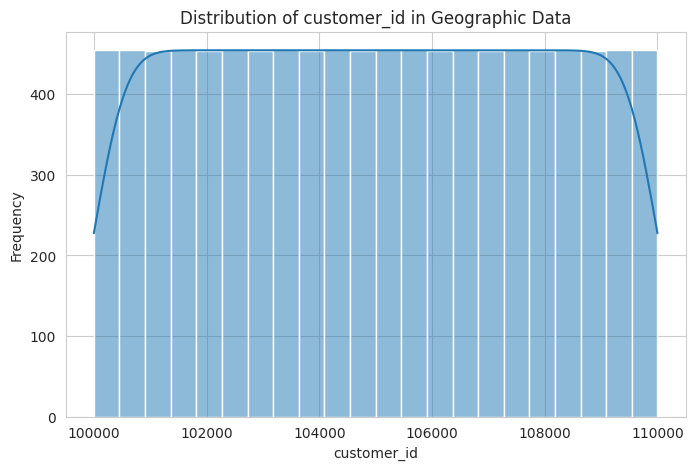

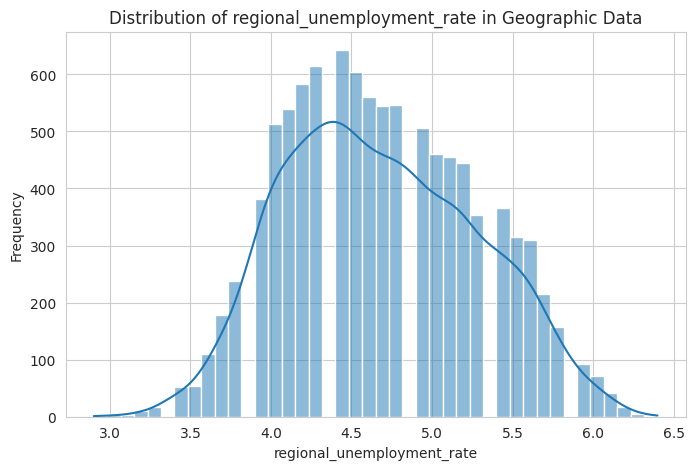

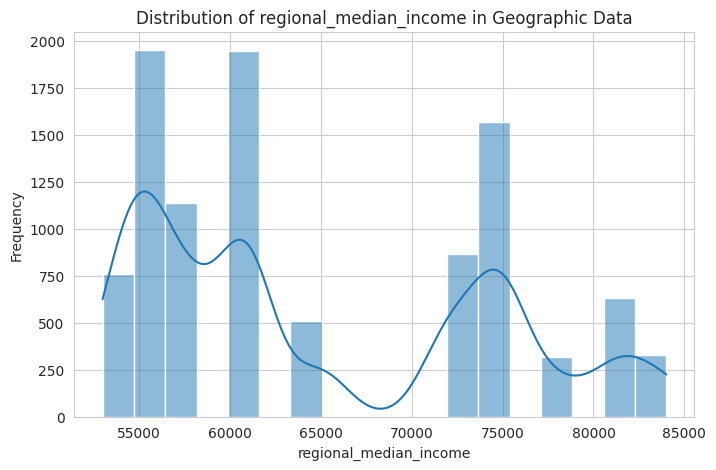

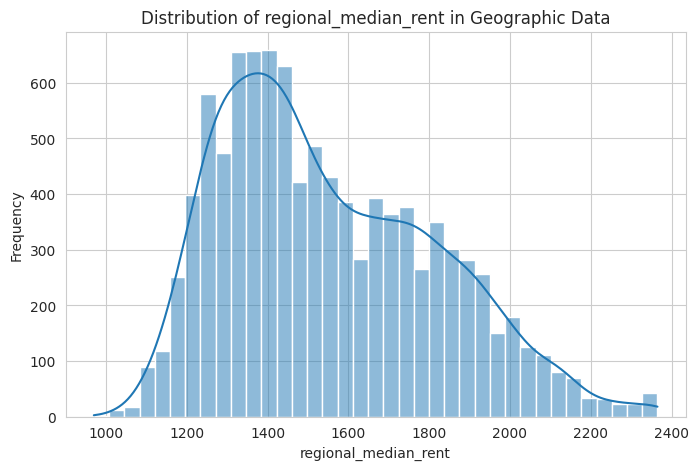

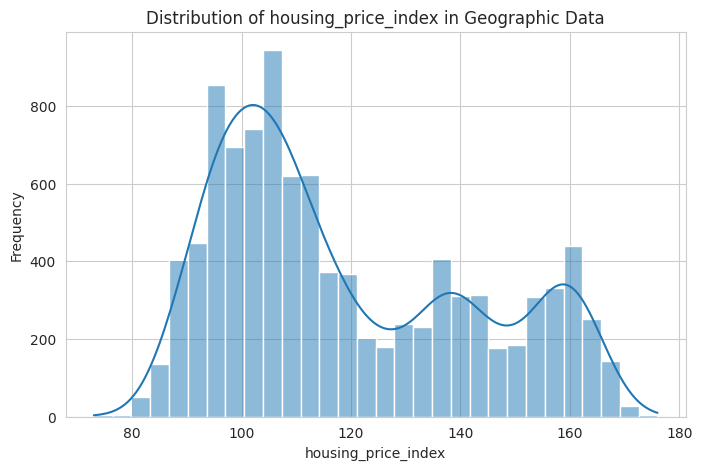

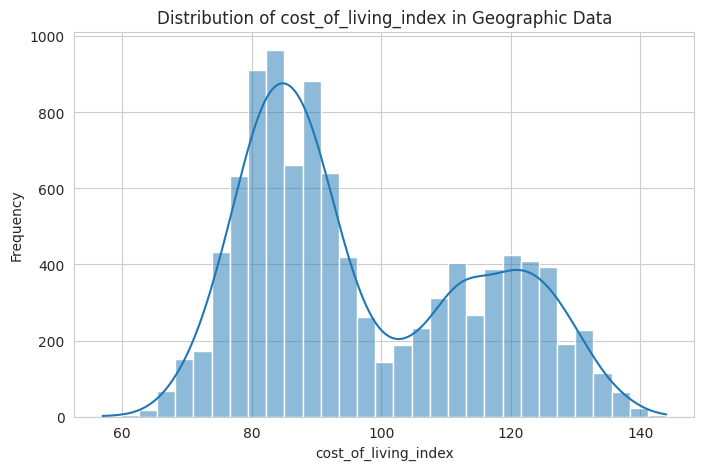

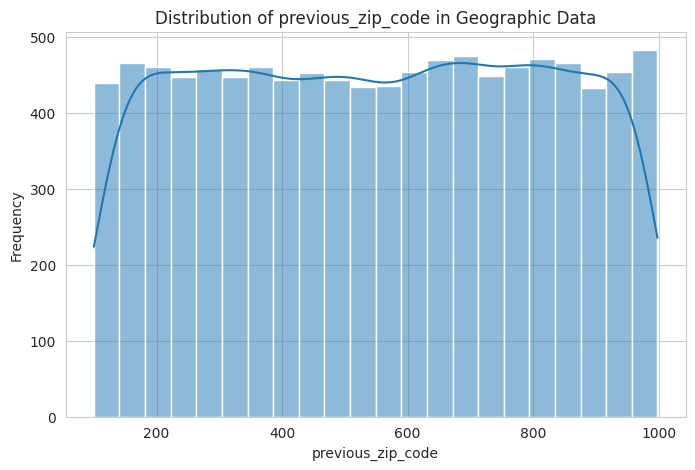

In [147]:
numerical_cols_geographic = geographic_data_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_geographic:
    plt.figure(figsize=(8, 5))
    sns.histplot(geographic_data_df[col], kde=True)
    plt.title(f'Distribution of {col} in Geographic Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

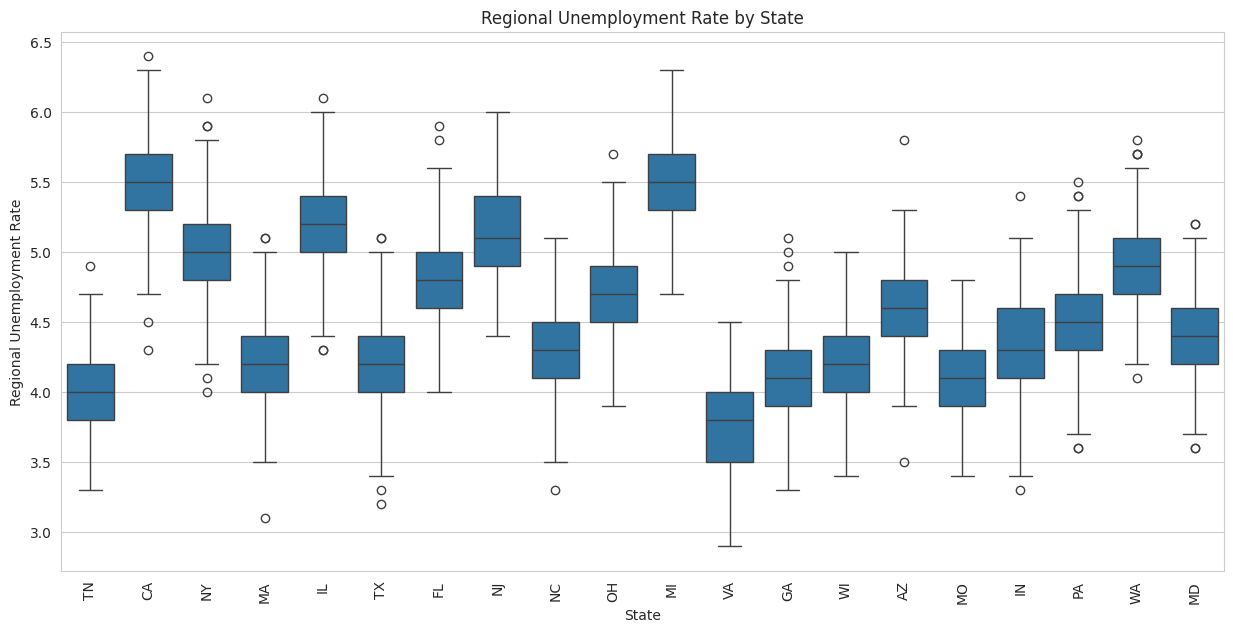

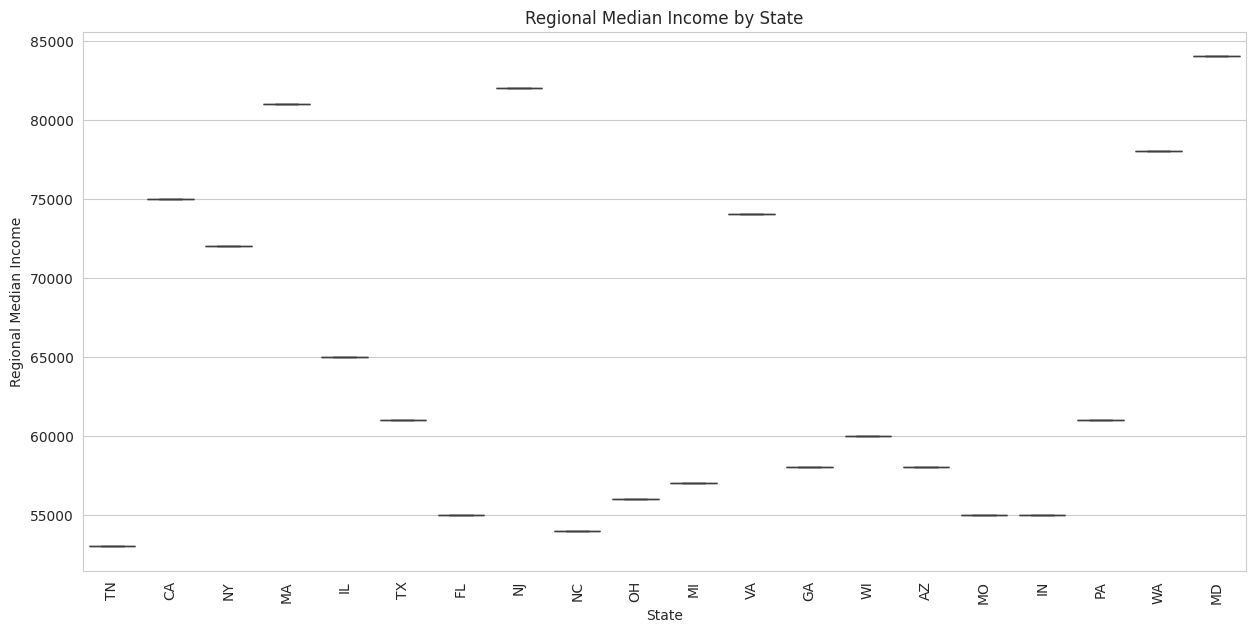

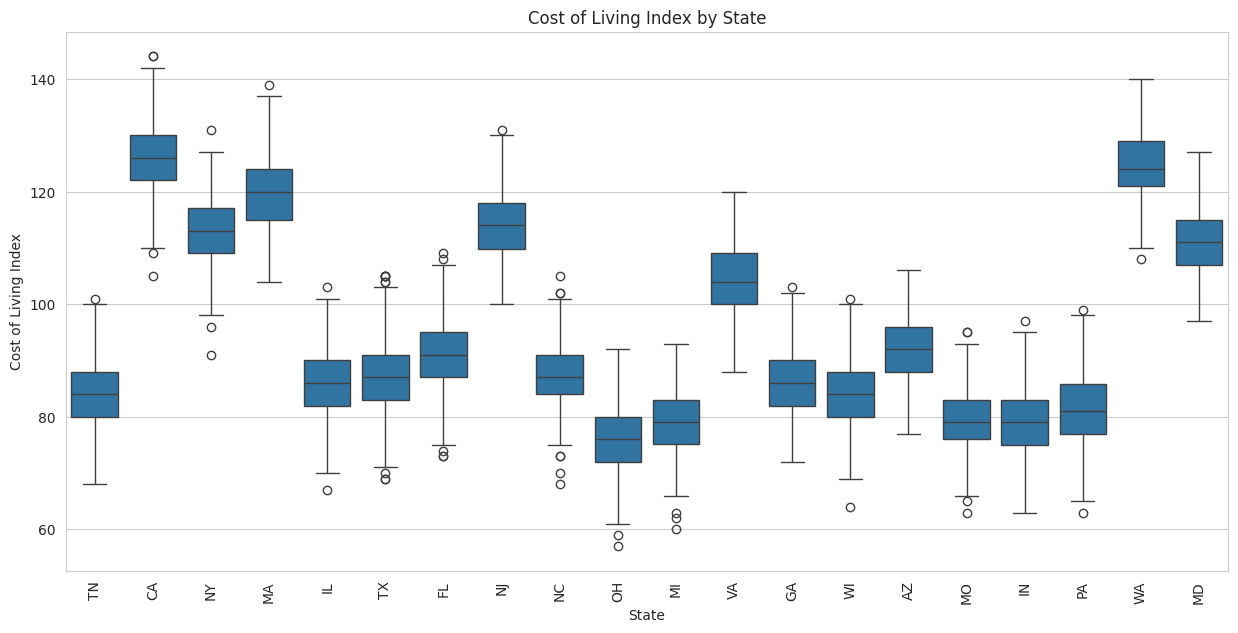

In [148]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='regional_unemployment_rate', data=geographic_data_df)
plt.title('Regional Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Regional Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='regional_median_income', data=geographic_data_df)
plt.title('Regional Median Income by State')
plt.xlabel('State')
plt.ylabel('Regional Median Income')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='cost_of_living_index', data=geographic_data_df)
plt.title('Cost of Living Index by State')
plt.xlabel('State')
plt.ylabel('Cost of Living Index')
plt.xticks(rotation=90)
plt.show()

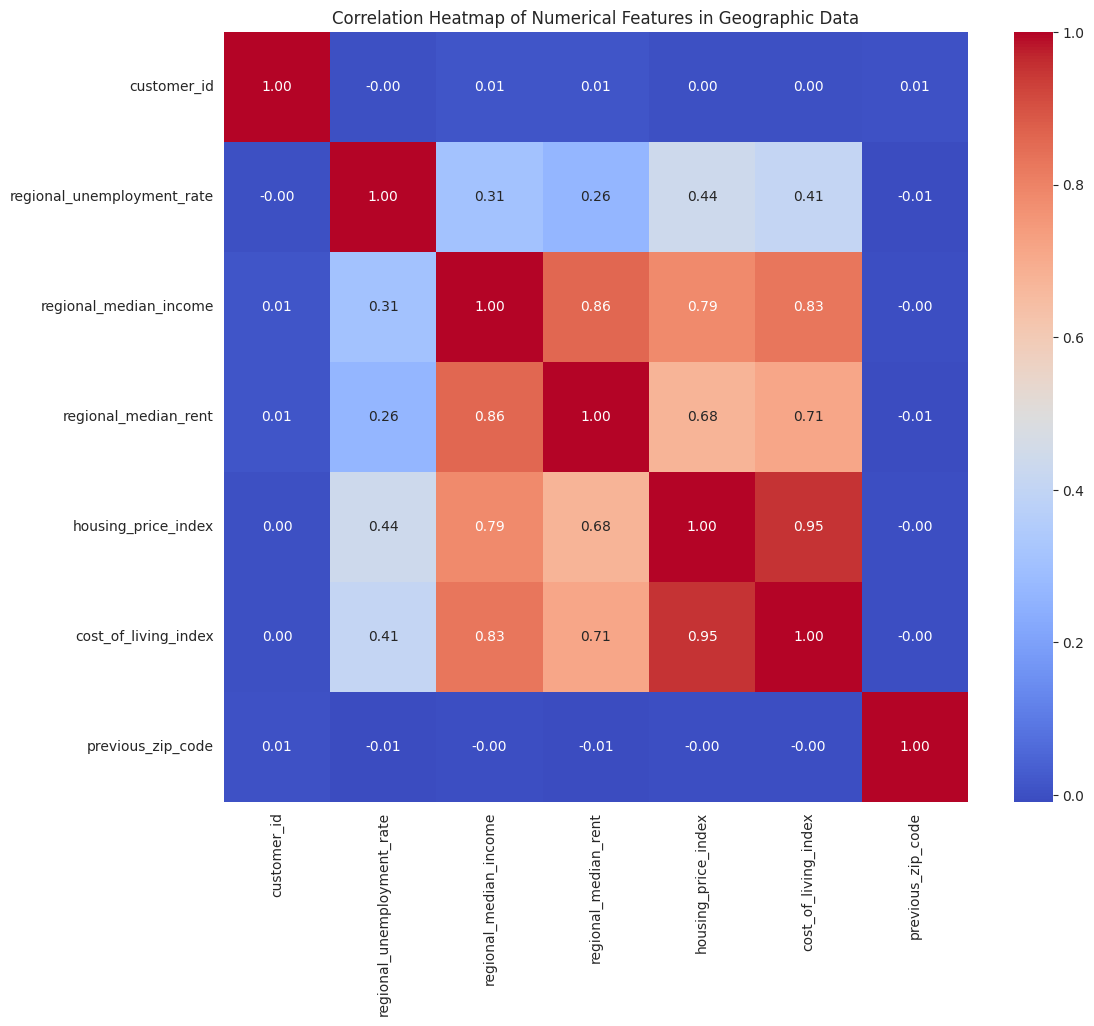

In [149]:
plt.figure(figsize=(12, 10))
corr_matrix_geographic = geographic_data_df[numerical_cols_geographic].corr()
sns.heatmap(corr_matrix_geographic, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Geographic Data')
plt.show()

In [150]:
geographic_data_df['housing_affordability_index'] = geographic_data_df['regional_median_rent'] / (geographic_data_df['regional_median_income'] + 1)

# One-hot encode the 'state' column
geographic_data_df = pd.get_dummies(geographic_data_df, columns=['state'], drop_first=True, dtype=int)

print("New features engineered and categorical variables encoded for geographic_data_df:")
display(geographic_data_df.head())
print(geographic_data_df.info())

New features engineered and categorical variables encoded for geographic_data_df:


customer_id  regional_unemployment_rate  regional_median_income  \
0       100000                         4.1                 53000.0   
1       100001                         5.6                 75000.0   
2       100002                         4.9                 72000.0   
3       100003                         4.0                 81000.0   
4       100004                         4.8                 65000.0   

   regional_median_rent  housing_price_index  cost_of_living_index  \
0                1400.0                 99.0                  73.0   
1                1580.0                161.0                 130.0   
2                1740.0                138.0                 118.0   
3                1770.0                140.0                 116.0   
4                1520.0                 96.0                  86.0   

   previous_zip_code  housing_affordability_index  state_CA  state_FL  ...  \
0              390.0                     0.026415         0         0  ...   
1              292.0                     0.021066         1         0  ...   
2              552.0                     0.024166         0         0  ...   
3              716.0                     0.021852         0         0  ...   
4              559.0                     0.023384         0         0  ...   

   state_NC  state_NJ  state_NY  state_OH  state_PA  state_TN  state_TX  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         1         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   state_VA  state_WA  state_WI  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0  

[5 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  10001 non-null  int64  
 1   regional_unemployment_rate   10001 non-null  float64
 2   regional_median_income       10001 non-null  float64
 3   regional_median_rent         10001 non-null  float64
 4   housing_price_index          10001 non-null  float64
 5   cost_of_living_index         10001 non-null  float64
 6   previous_zip_code            10001 non-null  float64
 7   housing_affordability_index  10001 non-null  float64
 8   state_CA                     10001 non-null  int64  
 9   state_FL                     10001 non-null  int64  
 10  state_GA                     10001 non-null  int64  
 11  state_IL                     10001 non-null  int64  
 12  state_IN                     10001 non-null  int64  
 13  state_MA        

In [151]:
loan_details_df = pd.read_excel('loan_details.xlsx')

display(loan_details_df.head())
print(loan_details_df.info())
display(loan_details_df.describe())
print(loan_details_df.isnull().sum())
print("Duplicates:", loan_details_df.duplicated().sum())

customer_id    loan_type loan_amount  loan_term  interest_rate  \
0       100000     Personal      $11300         24          10.26   
1       100001           CC       6,800          0          17.74   
2       100002  credit card      $3,400          0          19.42   
3       100003           CC     $12,000          0          20.95   
4       100004     MORTGAGE    $279,900        360           6.99   

         loan_purpose  loan_to_value_ratio origination_channel  \
0  Debt Consolidation                0.000              Online   
1    Revolving Credit                0.000              Branch   
2    Revolving Credit                0.000              Online   
3    Revolving Credit                0.000              Online   
4           Refinance                0.798              Online   

   loan_officer_id marketing_campaign  
0             1066                  T  
1             1041                  B  
2             1001                  W  
3             1098                  D  
4             1067                  H

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10001 non-null  int64  
 1   loan_type            10001 non-null  object 
 2   loan_amount          10001 non-null  object 
 3   loan_term            10001 non-null  int64  
 4   interest_rate        10001 non-null  float64
 5   loan_purpose         10001 non-null  object 
 6   loan_to_value_ratio  10001 non-null  float64
 7   origination_channel  10001 non-null  object 
 8   loan_officer_id      10001 non-null  int64  
 9   marketing_campaign   10001 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 781.5+ KB
None


customer_id     loan_term  interest_rate  loan_to_value_ratio  \
count   10001.000000  10001.000000   10001.000000         10001.000000   
mean   105000.000000    131.150485      11.310271             0.272052   
std      2887.184355    152.388277       4.628415             0.377615   
min    100000.000000      0.000000       2.500000             0.000000   
25%    102500.000000      0.000000       6.930000             0.000000   
50%    105000.000000     48.000000      11.270000             0.000000   
75%    107500.000000    360.000000      15.200000             0.723000   
max    110000.000000    360.000000      22.270000             0.970000   

       loan_officer_id  
count     10001.000000  
mean       1045.573043  
std          32.390923  
min         995.000000  
25%        1010.000000  
50%        1048.000000  
75%        1077.000000  
max        1099.000000

customer_id            0
loan_type              0
loan_amount            0
loan_term              0
interest_rate          0
loan_purpose           0
loan_to_value_ratio    0
origination_channel    0
loan_officer_id        0
marketing_campaign     0
dtype: int64
Duplicates: 0


In [152]:
loan_details_df['loan_amount'] = (
    loan_details_df['loan_amount']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Normalize text columns
for col in ['loan_type', 'loan_purpose', 'origination_channel', 'marketing_campaign']:
    loan_details_df[col] = loan_details_df[col].str.upper().str.strip()

# Cap outliers using IQR method for numerical columns
numerical_cols_for_outlier_loan = [
    'loan_amount',
    'loan_term',
    'interest_rate',
    'loan_to_value_ratio',
    'loan_officer_id'
]

for col in numerical_cols_for_outlier_loan:
    Q1 = loan_details_df[col].quantile(0.25)
    Q3 = loan_details_df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    loan_details_df[col] = np.where(
        loan_details_df[col] > upper_bound, upper_bound,
        np.where(loan_details_df[col] < lower_bound, lower_bound, loan_details_df[col])
    )

print("Loan Details DataFrame after cleaning and outlier capping:")
display(loan_details_df.head())
print(loan_details_df.info())
print(loan_details_df.isnull().sum())

Loan Details DataFrame after cleaning and outlier capping:


customer_id    loan_type  loan_amount  loan_term  interest_rate  \
0       100000     PERSONAL      11300.0       24.0          10.26   
1       100001           CC       6800.0        0.0          17.74   
2       100002  CREDIT CARD       3400.0        0.0          19.42   
3       100003           CC      12000.0        0.0          20.95   
4       100004     MORTGAGE     279900.0      360.0           6.99   

         loan_purpose  loan_to_value_ratio origination_channel  \
0  DEBT CONSOLIDATION                0.000              ONLINE   
1    REVOLVING CREDIT                0.000              BRANCH   
2    REVOLVING CREDIT                0.000              ONLINE   
3    REVOLVING CREDIT                0.000              ONLINE   
4           REFINANCE                0.798              ONLINE   

   loan_officer_id marketing_campaign  
0           1066.0                  T  
1           1041.0                  B  
2           1001.0                  W  
3           1098.0                  D  
4           1067.0                  H

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          10001 non-null  int64  
 1   loan_type            10001 non-null  object 
 2   loan_amount          10001 non-null  float64
 3   loan_term            10001 non-null  float64
 4   interest_rate        10001 non-null  float64
 5   loan_purpose         10001 non-null  object 
 6   loan_to_value_ratio  10001 non-null  float64
 7   origination_channel  10001 non-null  object 
 8   loan_officer_id      10001 non-null  float64
 9   marketing_campaign   10001 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 781.5+ KB
None
customer_id            0
loan_type              0
loan_amount            0
loan_term              0
interest_rate          0
loan_purpose           0
loan_to_value_ratio    0
origination_channel    0
loan_officer_id       

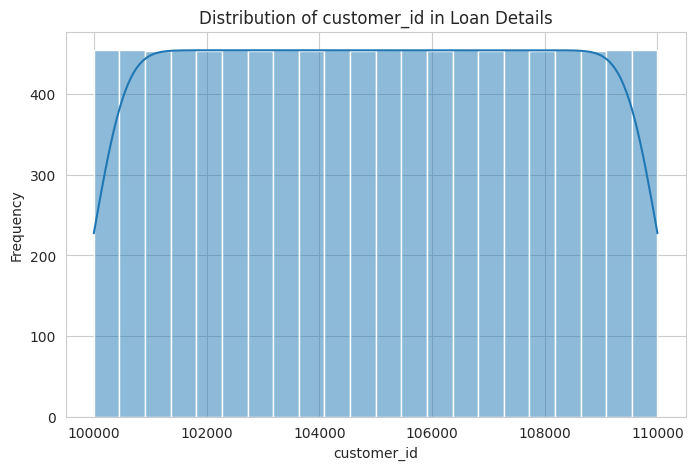

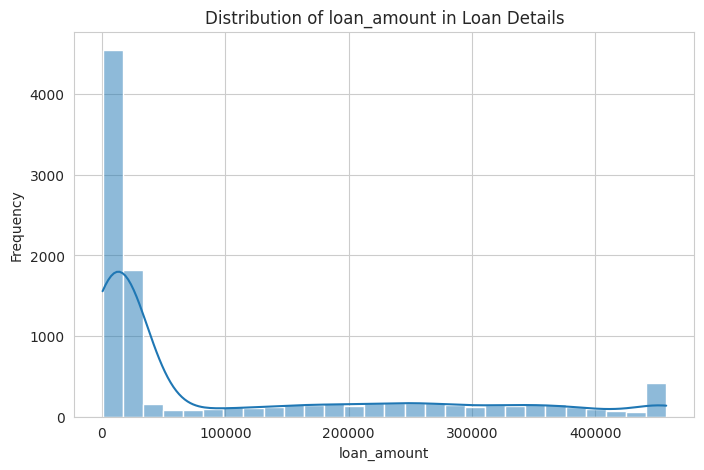

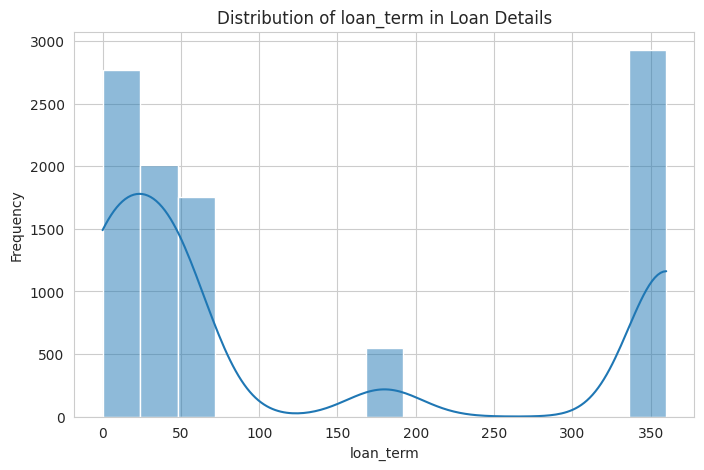

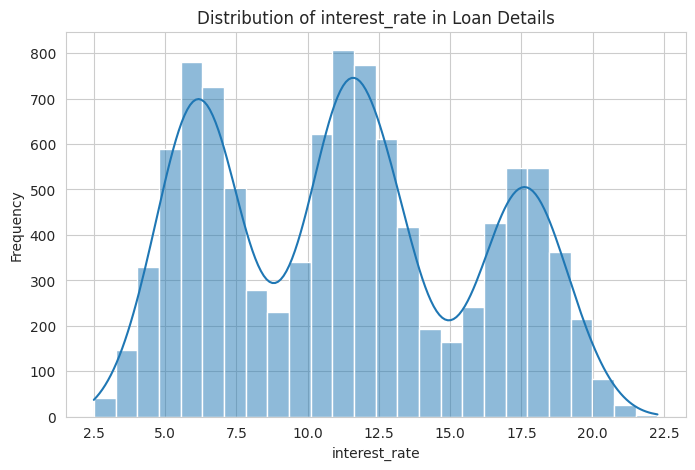

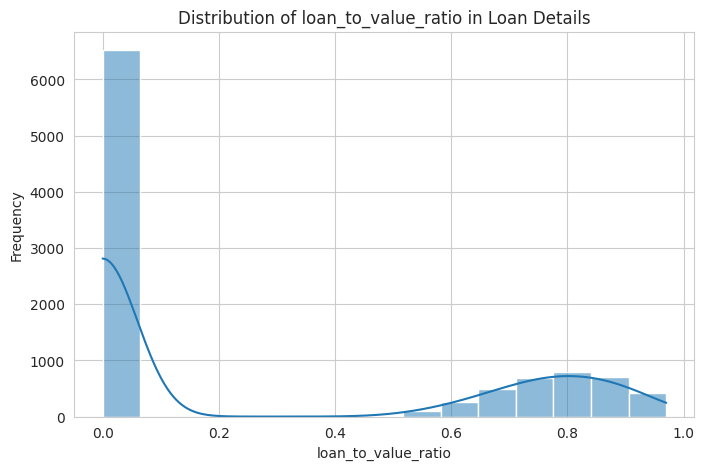

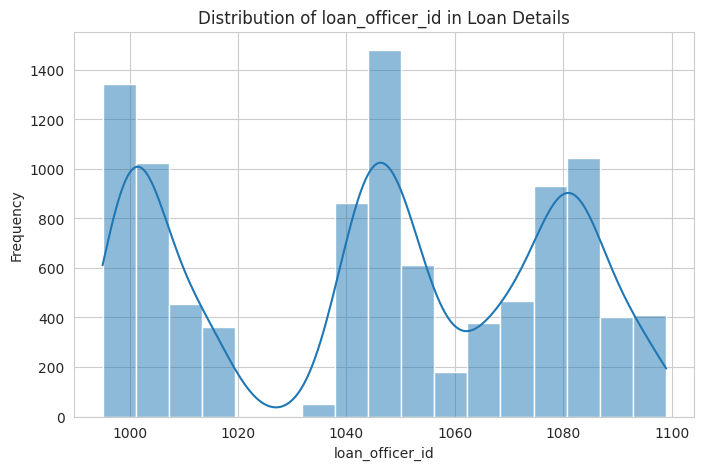

In [153]:
numerical_cols_loan = loan_details_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols_loan:
    plt.figure(figsize=(8, 5))
    sns.histplot(loan_details_df[col], kde=True)
    plt.title(f'Distribution of {col} in Loan Details')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

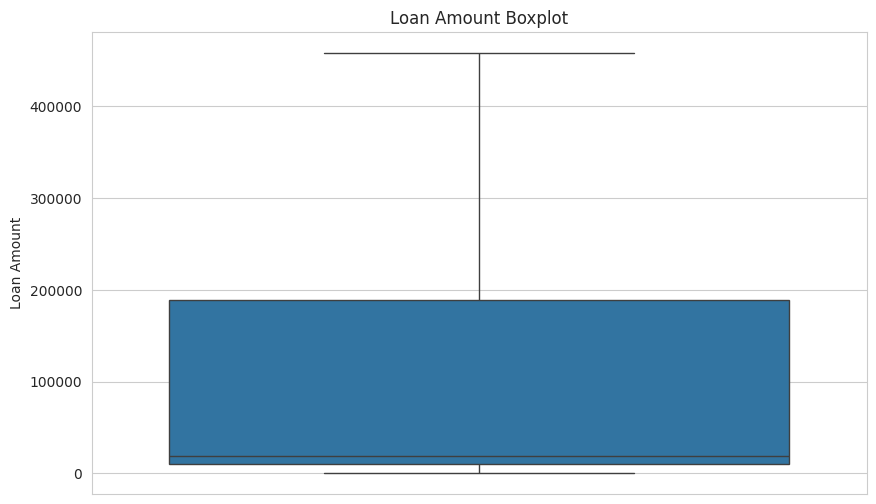

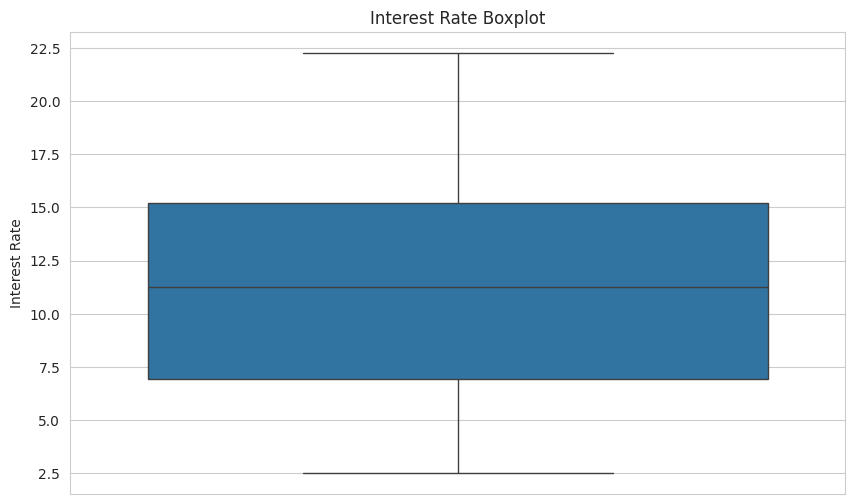

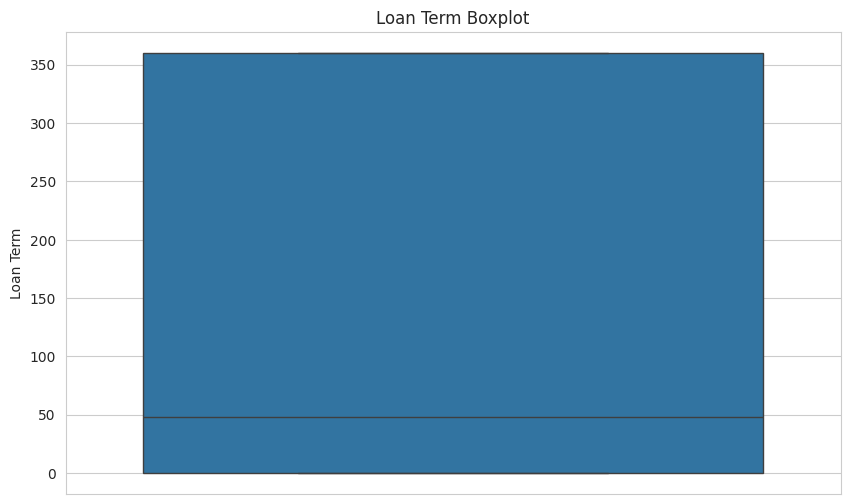

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_details_df['loan_amount'])
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_details_df['interest_rate'])
plt.title('Interest Rate Boxplot')
plt.ylabel('Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_details_df['loan_term'])
plt.title('Loan Term Boxplot')
plt.ylabel('Loan Term')
plt.show()

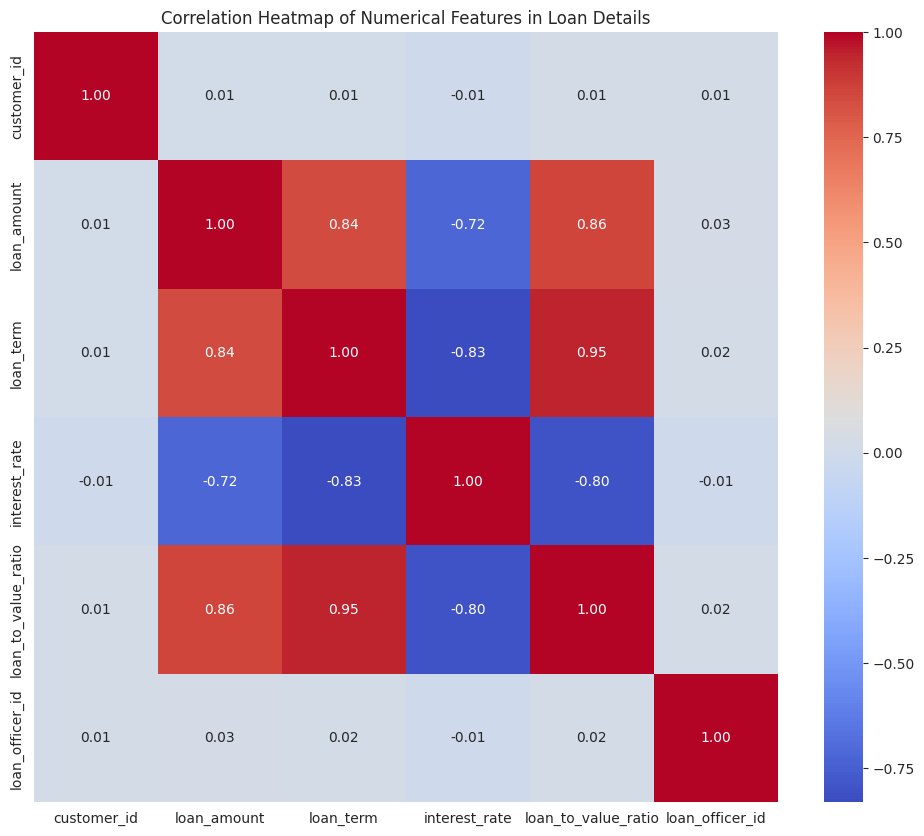

In [155]:
plt.figure(figsize=(12, 10))
corr_matrix_loan = loan_details_df[numerical_cols_loan].corr()
sns.heatmap(corr_matrix_loan, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features in Loan Details')
plt.show()

In [156]:
loan_details_df['loan_to_term_ratio'] = loan_details_df['loan_amount'] / (loan_details_df['loan_term'] + 1)
loan_details_df['interest_rate_per_amount'] = loan_details_df['interest_rate'] / (loan_details_df['loan_amount'] + 1)

categorical_cols_loan_encode = ['loan_type', 'loan_purpose', 'origination_channel', 'marketing_campaign']
loan_details_df = pd.get_dummies(loan_details_df, columns=categorical_cols_loan_encode, drop_first=True, dtype=int)

print("New features engineered and categorical variables encoded for loan_details_df:")
display(loan_details_df.head())
print(loan_details_df.info())

New features engineered and categorical variables encoded for loan_details_df:


customer_id  loan_amount  loan_term  interest_rate  loan_to_value_ratio  \
0       100000      11300.0       24.0          10.26                0.000   
1       100001       6800.0        0.0          17.74                0.000   
2       100002       3400.0        0.0          19.42                0.000   
3       100003      12000.0        0.0          20.95                0.000   
4       100004     279900.0      360.0           6.99                0.798   

   loan_officer_id  loan_to_term_ratio  interest_rate_per_amount  \
0           1066.0           452.00000                  0.000908   
1           1041.0          6800.00000                  0.002608   
2           1001.0          3400.00000                  0.005710   
3           1098.0         12000.00000                  0.001746   
4           1067.0           775.34626                  0.000025   

   loan_type_CREDIT CARD  loan_type_CREDITCARD  ...  marketing_campaign_Q  \
0                      0                     0  ...                     0   
1                      0                     0  ...                     0   
2                      1                     0  ...                     0   
3                      0                     0  ...                     0   
4                      0                     0  ...                     0   

   marketing_campaign_R  marketing_campaign_S  marketing_campaign_T  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   marketing_campaign_U  marketing_campaign_V  marketing_campaign_W  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   marketing_campaign_X  marketing_campaign_Y  marketing_campaign_Z  
0                     0                     0                     0  
1                     0                     0                     0  
2                     0                     0                     0  
3                     0                     0                     0  
4                     0                     0                     0  

[5 rows x 49 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      10001 non-null  int64  
 1   loan_amount                      10001 non-null  float64
 2   loan_term                        10001 non-null  float64
 3   interest_rate                    10001 non-null  float64
 4   loan_to_value_ratio              10001 non-null  float64
 5   loan_officer_id                  10001 non-null  float64
 6   loan_to_term_ratio               10001 non-null  float64
 7   interest_rate_per_amount         10001 non-null  float64
 8   loan_type_CREDIT CARD            10001 non-null  int64  
 9   loan_type_CREDITCARD             10001 non-null  int64  
 10  loan_type_HOME LOAN              10001 non-null  int64  
 11  loan_type_MORTGAGE               10001 non-null  int64  
 12  loan_type_PERSONAL

In [157]:
master_df = pd.merge(application_metadata_df, credit_history_df, on='customer_id', how='inner')
master_df = pd.merge(master_df, demographics_df, on='customer_id', how='inner')
master_df = pd.merge(master_df, financial_ratios_df, on='customer_id', how='inner')
master_df = pd.merge(master_df, geographic_data_df, on='customer_id', how='inner')
master_df = pd.merge(master_df, loan_details_df, on='customer_id', how='inner')

print("Master DataFrame after all merges:")
display(master_df.head())
print(master_df.info())
print("Null values in Master DataFrame after merges:")
print(master_df.isnull().sum())

Master DataFrame after all merges:


customer_id  application_id  application_hour  application_day_of_week  \
0       100000          618540              21.0                      0.0   
1       100001          589784               9.0                      6.0   
2       100002          554219              10.0                      4.0   
3       100003          613505               3.0                      4.0   
4       100004          571219               9.0                      1.0   

   account_open_year  random_noise_1  num_login_sessions  \
0             2018.0        1.141229                12.0   
1             2021.0        0.943839                10.0   
2             2019.0       -0.116033                 4.0   
3             2011.0       -0.040562                 7.0   
4             2021.0        0.819017                 6.0   

   num_customer_service_calls  has_mobile_app  paperless_billing  ...  \
0                         2.0               0                  0  ...   
1                         4.0               0                  1  ...   
2                         3.0               1                  1  ...   
3                         0.0               1                  0  ...   
4                         0.0               1                  0  ...   

   marketing_campaign_Q  marketing_campaign_R  marketing_campaign_S  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   marketing_campaign_T  marketing_campaign_U  marketing_campaign_V  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   marketing_campaign_W  marketing_campaign_X  marketing_campaign_Y  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   marketing_campaign_Z  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 1930 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 1930 entries, customer_id to marketing_campaign_Z
dtypes: float64(58), int64(1872)
memory usage: 147.3 MB
None
Null values in Master DataFrame after merges:
customer_id                0
application_id             0
application_hour           0
application_day_of_week    0
account_open_year          0
                          ..
marketing_campaign_V       0
marketing_campaign_W       0
marketing_campaign_X       0
marketing_campaign_Y       0
marketing_campaign_Z       0
Length: 1930, dtype: int64


In [158]:
from sklearn.model_selection import train_test_split

# 1. Create a new binary target variable 'loan_default'
master_df['loan_default'] = np.where(
    (master_df['num_delinquencies_2yrs'] > 0) | (master_df['num_collections'] > 0), 1, 0
)

# 2. Define the target variable (y)
y = master_df['loan_default']

# 3. Define the feature matrix (X) by dropping 'customer_id', 'loan_amount', and 'loan_default'
X = master_df.drop(columns=['customer_id', 'loan_amount', 'loan_default'])

# 4. Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Print the shapes of X_train, X_test, y_train, and y_test
print("Data split into training and testing sets successfully for classification.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully for classification.
X_train shape: (8000, 1928)
X_test shape: (2001, 1928)
y_train shape: (8000,)
y_test shape: (2001,)


In [159]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier obyektini yarating
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Modelni o'qiting
rf_classifier.fit(X_train, y_train)

print("RandomForestClassifier modeli muvaffaqiyatli o'qitildi.")

RandomForestClassifier modeli muvaffaqiyatli o'qitildi.



--- Model Evaluation ---
Accuracy: 0.9975
Precision: 0.9515
Recall: 1.0000
F1-score: 0.9751
AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       0.95      1.00      0.98        98

    accuracy                           1.00      2001
   macro avg       0.98      1.00      0.99      2001
weighted avg       1.00      1.00      1.00      2001



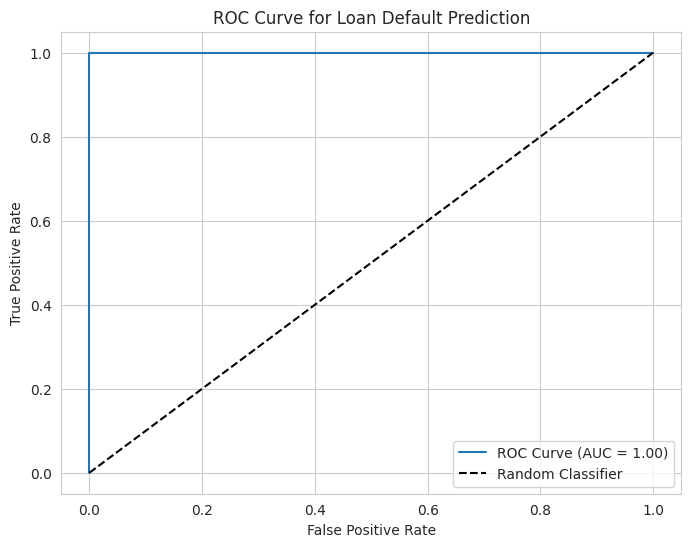

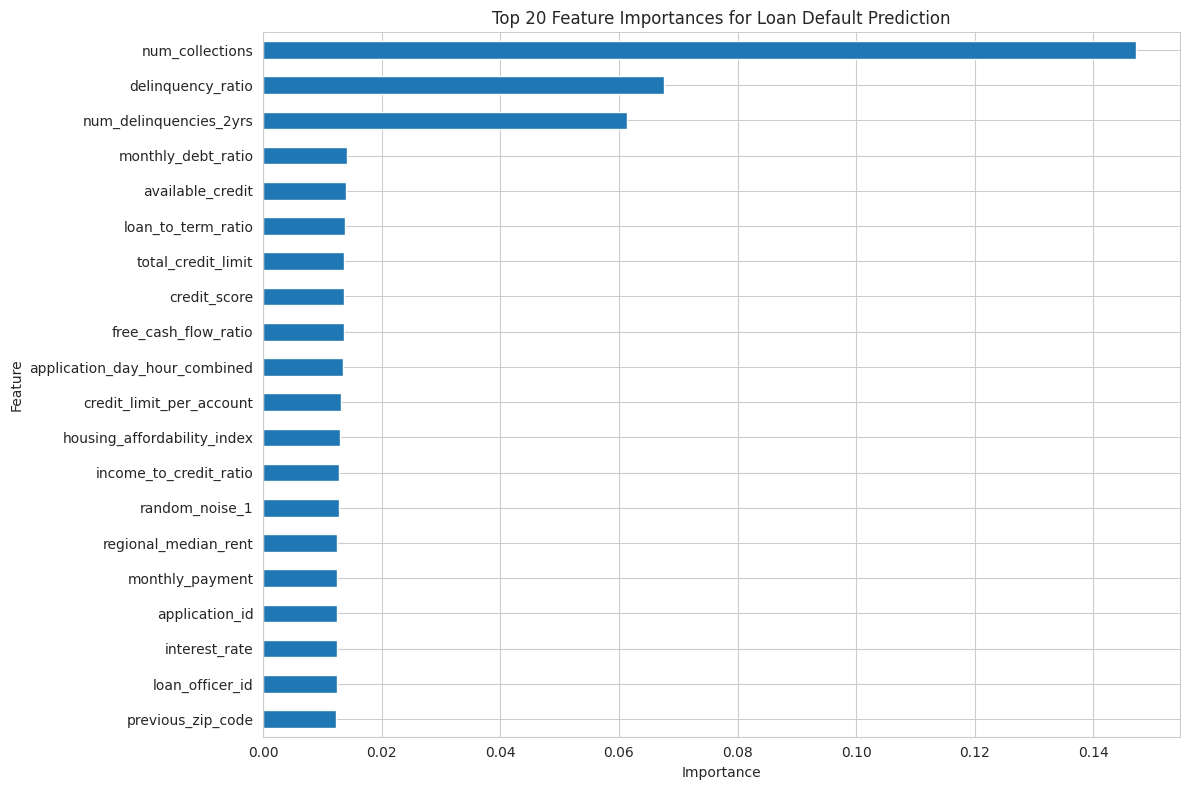

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train a RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# 2. Make predictions on the test set and adjust threshold
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Set a lower threshold for classification to ensure some positive predictions
threshold = 0.1 # Example threshold, can be tuned
y_pred = (y_pred_proba >= threshold).astype(int)

# 3. Evaluate model performance
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Check if y_test contains both classes for meaningful binary metrics
if y_test.nunique() > 1 and 1 in y_test.unique():
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
    # AUC is calculated from probabilities, not predictions, so it's less affected by thresholding
    print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
else:
    print("Metrics (Precision, Recall, F1-score, AUC) and ROC curve cannot be computed as the test set lacks positive samples.")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 4. Visualize the ROC curve
if y_test.nunique() > 1 and 1 in y_test.unique():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Loan Default Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC curve cannot be plotted due to single class in target (test set).")

# 5. Calculate and visualize top N feature importances
importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
top_n = 20  # You can change N to visualize more or fewer features
plt.figure(figsize=(12, 8))
importances.nlargest(top_n).sort_values(ascending=True).plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances for Loan Default Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()